<a href="https://colab.research.google.com/github/arnav4sach/BA780/blob/main/Copy_of_A06_Corporate_Pulse_How_Performance_Drives_Market_Moves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem**

This study aims to determine whether KPIs have historically been associated with future stock performance of a company, with a focus on finding correlations between financial statement variables and stock performance/return. Generally speaking, investors are often told they "cannot beat the market," but this project will provide insights to help them get over many of these roadblocks by assisting them in choosing better investments based on performance and the quantitative indicators that are linked with it.

We're going to:

1. Examine and contrast the relationship between annual stock returns and changes in variables from financial statements each year.

2. Create specific ratios by combining variables from financial documents
3. Determine which variables have the strongest relationships with stock returns.

Today, many day trading "savants" swear by methodologies related to investing based on the shape of stock charts and arbitrary metrics without really diving into the companies' operations and seeing how their true performance impacts the stock price. We believe that integrating quantitative investing concepts with data on company quality can offer a more reliable investment strategy than relying on quantitative or qualitative investing alone. The most successful hedge funds have already figured this out, but we believe that we can find interesting insights as well.




#**Executive Summary**

### 1. EOY Stock Price shows strong positive correlations with Sales/Revenue, Net Income, and Total Assets for companies like VICI, COP, AZO, and PNR
### 2. : Companies with higher PS ratios tend to have higher stock prices, suggesting that investors value strong revenue generation as a key factor in stock performance.
### 3. Higher COGS percentages negatively affect stock price changes.

# **Data Source**
An internationally renowned daily newspaper, The Wall Street Journal (WSJ) is well-known for its thorough coverage of business, financial markets, and economic news.

We took all the variables in the financial statements and used the publicly accessible financial statement data to select ten companies at random. Our goal is to find correlations between the financial statement variables and stock performance or return.

Drawing meaningful conclusions from data that is so diverse and has so many missing values makes it challenging for anyone to do so; but, with enough cleaning and careful investigation, obtaining such conclusions is not a tough undertaking.

5 Randomly selected companies from the Vanguard S&P 500 ETF (VOO)

*   418: Pentair plc (PNR)
*   168: Autozone (AZO)
*   67: ConocoPhillips (COP)
*   419: NortonLifeLock In	c. (GEN)
*   264: VICI Properties Inc. (VICI)

5 Randomly selected companies from the Vanguard Small-Cap Index Fund Admiral Shares (VSMAX)

*  836: 10X Genomics Inc. Class A (TXG)
*  714: UniFirst Corp./MA (UNF)
*  1278: NerdWallet Inc. Class A (NRDS)
*  519: Q2 Holdings Inc. (QTWO)
*  732: Peabody Energy Corp. (BTU)

# **Data Preprocessing**

Importing the files and loading the required libraries from the device. The pandas and numpy libraries are required in order to create dataframes and convert datatypes, respectively. To create the graphs, the matplotlib and seaborn libraries are needed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

Mounted at /content/drive


#**Loading the file**

This is the financial data, which contains information on each of the businesses listed above. The cash flow statements, balance sheet, and income statement are all included in this dataset.

In addition, it includes the prices of these companies' stocks.

We looked at every potential financial variable in the financial statements to determine which ones were most useful in determining which financial variables impact a company's stock values.

In [ ]:
df_fin = pd.read_excel('/content/drive/MyDrive/Copy of Data_BA_780_A6.gsheet')
df_fin.head()

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Sales Growth,Sales Trend,Cost of Goods Sold (COGS) incl. D&A,COGS excluding D&A,Depreciation & Amortization Expense,...,Cash Flow Trend,Free Cash Flow Yield,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174
0,10X Genomics Inc. Class A,TXG,55.96,2023.0,618727.0,0.1981,Increasing,209414.0,165795.0,43619.0,...,Increasing,-0.0097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10X Genomics Inc. Class A,TXG,36.44,2022.0,516409.0,0.0528,Increasing,120086.0,87080.0,33006.0,...,Decreasing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10X Genomics Inc. Class A,TXG,148.96,2021.0,490490.0,0.6413,Increasing,74091.0,45837.0,28254.0,...,Increasing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10X Genomics Inc. Class A,TXG,141.60,2020.0,298845.0,0.2153,Increasing,58468.0,39447.0,19021.0,...,Decreasing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10X Genomics Inc. Class A,TXG,76.25,2019.0,245893.0,-,-,61033.0,53967.0,7066.0,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**Cleaning the Data**

As the data was examined, it became clear that many organizations' records contained duplicate columns with year specifications. In addition, it was noted that some businesses reported their financial accounts in marginally different methods, and numerous financial variables lacked data. The required actions were done to guarantee the highest level of data cleanliness.

One significant issue that arose was the fact that some businesses had more than 150 columns, while others had more than 200 columns.

It was concluded that it would be more effective to create a new dataframe from the necessary columns rather than delete all the extraneous ones.

##**TXG**

This code loads a dataset from an Excel file and selects a subset of relevant columns related to financial and operational data for the "TXG" sheet. It removes certain rows by index, replaces any "-" values with NaN, and converts the "Year" column to a datetime format. Numeric columns such as "Sales Growth," "Gross Income," and "SG&A Expense" are converted to float type, and all other applicable columns are converted to numeric values where possible. Any missing numeric values (NaN) are filled with the mean of their respective columns. Finally, the processed DataFrame is stored as TXG_lp, and the first 20 rows of the modified DataFrame are displayed.

In [ ]:
# Define the ticker symbol
symbol = 'TXG'

# Get data on this ticker
tickerData = yf.Ticker(symbol)

# Get the historical prices for this ticker (daily data)
tickerDF = tickerData.history(start="2019-01-01", end="2024-01-03", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly = tickerDF['Close'].resample('Y').last()

# Convert to DataFrame and rename columns
tickerDF_yearly = tickerDF_yearly.reset_index()
tickerDF_yearly['Year'] = tickerDF_yearly['Date'].dt.year  # Extract year from the Date
tickerDF_yearly = tickerDF_yearly[['Year', 'Close']]  # Keep only Year and Close columns
tickerDF_yearly.columns = ['Year', 'EOY Stock Price']  # Rename columns for merging

# Load your Excel data
df_TXG = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='TXG')

# Select the required columns and drop duplicates
new_TXG = ["Company Name", "Code", "EOY Stock Price", "Year", "Sales/Revenue", "Sales Growth", "Sales Trend",
           "Cost of Goods Sold (COGS) incl. D&A", "Depreciation & Amortization Expense", "Depreciation",
           "Amortization of Intangibles", "COGS Growth", "Gross Income", "Gross Income Growth", "SG&A Expense", "EBIT",
           "Net Income", "Net Income Growth", "EPS (Basic)", "EBITDA", "Cash & Short Term Investments", "Cash Only",
           "Total Accounts Receivable", "Inventories", "Other Current Assets", "Total Current Assets",
           "Net Property, Plant & Equipment", "Buildings", "Machinery & Equipment", "Total Assets", "Short Term Debt",
           "Accounts Payable", "Total Current Liabilities", "Long-Term Debt", "Total Liabilities", "Common Equity (Total)",
           "Additional Paid-In Capital/Capital Surplus", "Retained Earnings", "Total Shareholders' Equity",
           "Liabilities & Shareholders' Equity", "Net Income before Extraordinaries", "Depreciation, Depletion & Amortization",
           "Changes in Working Capital", "Receivables", "Inventories", "Net Operating Cash Flow", "Capital Expenditures",
           "Change in Long-Term Debt", "Net Change in Cash", "Free Cash Flow"]
new_TXG_df = df_TXG[new_TXG]
new_TXG_df = new_TXG_df.drop(new_TXG_df.index[[5,6,7,8,9,10,11,12,13,14]])
new_TXG_df.replace('-', np.nan, inplace=True)

# Merge the new_TXG_df with the yearly stock price data
new_TXG_df = pd.merge(new_TXG_df, tickerDF_yearly, on='Year', how='left')

# Drop the old 'EOY Stock Price' column (optional if it already exists)
new_TXG_df.drop(columns=['EOY Stock Price_x'], inplace=True, errors='ignore')

# Rename new 'EOY Stock Price' column
new_TXG_df.rename(columns={'EOY Stock Price_y': 'EOY Stock Price'}, inplace=True)

# Type conversion and handling missing values
new_TXG_df['Sales Growth'] = new_TXG_df['Sales Growth'].astype(np.float64)
new_TXG_df['Gross Income'] = new_TXG_df['Gross Income'].astype(np.float64)
new_TXG_df['SG&A Expense'] = new_TXG_df['SG&A Expense'].astype(np.float64)

# Convert numeric columns to numeric types and fill missing values with the mean
for col in new_TXG_df.columns:
    if col not in ['Company Name', 'Code', "Year", "Sales Trend"]:  # Exclude non-numeric columns
        try:
            new_TXG_df[col] = pd.to_numeric(new_TXG_df[col])
        except:
            pass

# Fill missing numeric values with the column mean
new_TXG_df.fillna(new_TXG_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Check the updated DataFrame
# Ensure the Year column is in the correct format
new_TXG_df['Year'] = pd.to_datetime(new_TXG_df['Year'], format='%Y').dt.year
new_TXG_df.head()

<ipython-input-3-7b809b793b53>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly = tickerDF['Close'].resample('Y').last()
<ipython-input-3-7b809b793b53>:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_TXG_df.replace('-', np.nan, inplace=True)


,Company Name,Code,Year,Sales/Revenue,Sales Growth,Sales Trend,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Depreciation,Amortization of Intangibles,...,"Depreciation, Depletion & Amortization",Changes in Working Capital,Receivables,Inventories,Net Operating Cash Flow,Capital Expenditures,Change in Long-Term Debt,Net Change in Cash,Free Cash Flow,EOY Stock Price
0,10X Genomics Inc. Class A,TXG,2023,618727.0,0.198100,Increasing,209414.0,43619.0,41007.0,2612.0,...,43619.0,17343.0,-10613.0,74.0,-15197.0,-49524.0,-5814.00,131931.0,-63798.0,55.959999
1,10X Genomics Inc. Class A,TXG,2022,516409.0,0.052800,Increasing,120086.0,33006.0,30438.0,2568.0,...,33006.0,-39417.0,-18948.0,82.0,-33606.0,-131661.0,-5409.00,-368720.0,-165267.0,36.439999
2,10X Genomics Inc. Class A,TXG,2021,490490.0,0.641300,Increasing,74091.0,28254.0,25636.0,2618.0,...,28254.0,-87445.0,-34041.0,60.0,-21373.0,-101278.0,-5028.00,-92571.0,-122651.0,148.960007
3,10X Genomics Inc. Class A,TXG,2020,298845.0,0.215300,Increasing,58468.0,19021.0,17309.0,1712.0,...,19021.0,-50381.0,-17847.0,30.0,-217898.0,-38394.0,-37104.00,212151.0,-254564.0,141.600006
4,10X Genomics Inc. Class A,TXG,2019,245893.0,0.276875,NaN,61033.0,7066.0,6700.0,366.0,...,7066.0,44764.0,-5284.0,15.0,34627.0,-42767.0,-13338.75,406405.0,-8115.0,76.250000


##**COP**

The code loads an Excel sheet labeled 'COP' into a DataFrame, cleans up column names by stripping any leading or trailing spaces, and then selects specific columns of interest for further analysis. It replaces any missing values denoted by '-' with `NaN` and converts the 'Year' column into `datetime` format. For all numeric columns, it attempts to convert the data to numeric format, excluding non-numeric columns like 'Company Name' and 'Code'. Missing numeric values are filled with the mean of their respective columns, and any columns that consist entirely of missing values are removed. The cleaned DataFrame is then assigned to `COP_lp`, and the first few rows of the processed DataFrame are displayed.

In [ ]:
# Step 1: Fetch yearly stock prices
symbol_COP = 'COP'
tickerData_COP = yf.Ticker(symbol_COP)
tickerDF_COP = tickerData_COP.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample daily stock prices to get the last trading day's closing price of each year
tickerDF_yearly_COP = tickerDF_COP['Close'].resample('Y').last()

# Step 2: Create a DataFrame for years and EOY stock prices
yearly_stock_data = pd.DataFrame({
    'Year': tickerDF_yearly_COP.index.year,
    'EOY Stock Price': tickerDF_yearly_COP.values
})

# Step 3: Load your existing Excel data
df_COP = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='COP')
df_COP.columns = df_COP.columns.str.strip()

# Specify the columns you want to keep
new_COP = ["Company Name", "Code", "EOY Stock Price", "Year", "Sales/Revenue", "Sales Growth", "Cost of Goods Sold (COGS) incl. D&A",
           "Depreciation & Amortization Expense", "Depreciation and Depletion", "COGS Growth", "Gross Income", "Gross Income Growth",
           "SG&A Expense", "EBIT", "Net Income", "Net Income Growth", "EPS (Basic)", "EBITDA", "Cash & Short Term Investments",
           "Cash Only", "Total Accounts Receivable", "Inventories", "Other Current Assets", "Total Current Assets",
           "Net Property, Plant & Equipment", "Total Assets", "Short Term Debt", "Accounts Payable", "Total Current Liabilities",
           "Long-Term Debt", "Total Liabilities", "Common Equity (Total)", "Additional Paid-In Capital/Capital Surplus",
           "Retained Earnings", "Total Shareholders' Equity", "Liabilities & Shareholders' Equity", "Net Income before Extraordinaries",
           "Depreciation, Depletion & Amortization", "Changes in Working Capital", "Receivables", "Inventories"]

new_COP_df = df_COP[new_COP]

# Step 4: Replace missing values and handle non-numeric columns
new_COP_df.replace('-', np.nan, inplace=True)
# Ensure 'Year' column in both DataFrames have the same data type (int)
new_COP_df['Year'] = pd.to_datetime(new_COP_df['Year'], format='%Y').dt.year # Convert to datetime then extract year as int
# new_COP_df['Year'] = new_COP_df['Year'].dt.year  # Extract year as integers


for col in new_COP_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_COP_df[col] = pd.to_numeric(new_COP_df[col])
        except:
            pass

# Fill NaN with column means for numeric data
new_COP_df.fillna(new_COP_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Drop columns where all values are NaN
new_COP_df.dropna(how='all', axis=1, inplace=True)

# Step 5: Update the 'EOY Stock Price' column with the new stock price data
# Merge the new stock price data into the main DataFrame on the 'Year' column
new_COP_df = pd.merge(new_COP_df, yearly_stock_data, on='Year', how='left', suffixes=('', '_new'))

# Replace the old 'EOY Stock Price' with the new one
new_COP_df['EOY Stock Price'] = new_COP_df['EOY Stock Price_new']

# Drop the extra column used during the merge
new_COP_df.drop(columns=['EOY Stock Price_new'], inplace=True)

# Step 6: Final result
new_COP_df.head()


<ipython-input-4-b7e7c87d9d30>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_COP = tickerDF_COP['Close'].resample('Y').last()
<ipython-input-4-b7e7c87d9d30>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_COP_df.replace('-', np.nan, inplace=True)
<ipython-input-4-b7e7c87d9d30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_COP_df.replace('-', np.nan, inplace=True)
<ipython-input-4-b7e7c87d9d30>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Sales Growth,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Depreciation and Depletion,COGS Growth,...,Total Liabilities,Common Equity (Total),Additional Paid-In Capital/Capital Surplus,Retained Earnings,Total Shareholders' Equity,Net Income before Extraordinaries,"Depreciation, Depletion & Amortization",Changes in Working Capital,Receivables,Inventories
0,ConocoPhilips,COP,106.875381,2023,2233,0.116100,1604,123,8432,0.132600,...,46645,49279,61303,59268,49279,10957,8432,-1382,1333,-103
1,ConocoPhilips,COP,111.485977,2022,2001,0.095600,1416,110,7844,0.134800,...,45826,48003,61142,53029,48003,18680,7844,-234,-963,-38
2,ConocoPhilips,COP,64.933792,2021,1826,0.012300,1248,107,7252,-0.017700,...,45255,45406,60581,40674,45406,8079,7252,1271,-2500,-160
3,ConocoPhilips,COP,34.798145,2020,1804,-0.002900,1270,106,6604,0.021600,...,32769,29849,47133,35213,29849,-2655,6604,-372,521,-25
4,ConocoPhilips,COP,54.402424,2019,1809,0.055275,1243,105,6511,0.067825,...,35464,34981,46983,39742,34981,7257,6511,-579,505,-67


##**PNR**

This code loads data from an Excel sheet named 'PNR' into a DataFrame, removes any duplicate rows, and selects specific financial columns to create a new DataFrame `new_PNR_df`. It replaces any '-' values in the data with `NaN` and converts the 'Year' column to datetime format. For other numeric columns (excluding 'Company Name', 'Code', and 'Year'), the code attempts to convert them to numeric types and fills any missing values (`NaN`) in float columns with their respective column means. The processed DataFrame is assigned to `PNR_lp`, and the first few rows of the resulting DataFrame are displayed.

In [ ]:
# Step 1: Get the historical stock data for 'PNR' and resample it to yearly closing prices
symbol_PNR = 'PNR'
tickerData_PNR = yf.Ticker(symbol_PNR)
tickerDF_PNR = tickerData_PNR.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly_PNR = tickerDF_PNR['Close'].resample('Y').last()

# Extract the Year and EOY Stock Price from the resampled data
yearly_prices = tickerDF_yearly_PNR.reset_index()
yearly_prices['Year'] = yearly_prices['Date'].dt.year  # Extract year as an integer
yearly_prices = yearly_prices[['Year', 'Close']]  # Keep only Year and Close columns
yearly_prices.rename(columns={'Close': 'EOY Stock Price'}, inplace=True)

# Step 2: Load the Excel sheet and prepare for merging
df_PNR = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='PNR')
df_PNR.drop_duplicates(inplace=True)

# List of columns you want to keep
new_PNR = ["Company Name", "Code", "EOY Stock Price", "Year", "Sales/Revenue", "Sales Growth",
           "Cost of Goods Sold (COGS) incl. D&A", "Depreciation & Amortization Expense", "Depreciation",
           "Amortization of Intangibles", "COGS Growth", "Gross Income", "Gross Income Growth", "SG&A Expense",
           "EBIT", "Net Income", "Net Income Growth", "EPS (Basic)", "EBITDA", "Cash & Short Term Investments",
           "Cash Only", "Total Accounts Receivable", "Inventories", "Other Current Assets", "Total Current Assets",
           "Net Property, Plant & Equipment", "Buildings", "Machinery & Equipment", "Total Assets", "Short Term Debt",
           "Accounts Payable", "Total Current Liabilities", "Long-Term Debt", "Total Liabilities", "Common Equity (Total)",
           "Additional Paid-In Capital/Capital Surplus", "Retained Earnings", "Total Shareholders' Equity",
           "Liabilities & Shareholders' Equity", "Net Income before Extraordinaries", "Depreciation, Depletion & Amortization",
           "Changes in Working Capital", "Receivables", "Inventories", "Net Operating Cash Flow", "Capital Expenditures",
           "Change in Long-Term Debt", "Net Change in Cash", "Free Cash Flow"]

new_PNR_df = df_PNR[new_PNR]
new_PNR_df.replace('-', np.nan, inplace=True)

# Convert 'Year' to datetime format and numeric columns to appropriate data types
new_PNR_df['Year'] = pd.to_datetime(new_PNR_df['Year'], format='%Y').dt.year
for col in new_PNR_df.columns:
    if col not in ['Company Name', 'Code', "Year"]:  # Exclude non-numeric columns
        try:
            new_PNR_df[col] = pd.to_numeric(new_PNR_df[col])
        except:
            pass

# Fill missing values in numeric columns with column mean
new_PNR_df.fillna(new_PNR_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Step 3: Merge the historical stock data into the DataFrame
new_PNR_df = new_PNR_df.merge(yearly_prices, on='Year', how='left')

# Step 4: Check the updated DataFrame
new_PNR_df.head()


<ipython-input-5-5e5d91f7c535>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_PNR = tickerDF_PNR['Close'].resample('Y').last()
<ipython-input-5-5e5d91f7c535>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_PNR_df.replace('-', np.nan, inplace=True)
<ipython-input-5-5e5d91f7c535>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_PNR_df.replace('-', np.nan, inplace=True)
<ipython-input-5-5e5d91f7c535>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Company Name,Code,EOY Stock Price_x,Year,Sales/Revenue,Sales Growth,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Depreciation,Amortization of Intangibles,...,"Depreciation, Depletion & Amortization",Changes in Working Capital,Receivables,Inventories,Net Operating Cash Flow,Capital Expenditures,Change in Long-Term Debt,Net Change in Cash,Free Cash Flow,EOY Stock Price_y
0,Pentair PLC,PNR,72.71,2023,4105,-0.00420,2578,115,60,55,...,"1,14,800.00",-58600,-24400,678,"6,19,200.00",-76000,"-3,32,500.00",61400,"5,43,200.00",44.105904
1,Pentair PLC,PNR,44.98,2022,4122,0.09480,2757,107,54,53,...,"1,06,600.00","-2,14,900.00",30400,790,"3,63,300.00",-85200,"14,11,700.00",14400,"2,78,100.00",43.891228
2,Pentair PLC,PNR,73.03,2021,3765,0.24750,2446,78,51,26,...,77500,-32400,"-1,42,000.00",563,"6,13,200.00",-60200,55100,12400,"5,53,000.00",70.087395
3,Pentair PLC,PNR,53.09,2020,3018,0.02050,1952,75,47,28,...,75100,"1,14,600.00","1,48,300.00",420,"5,73,600.00",-62200,"-1,91,500.00",-400,"5,11,400.00",50.334702
4,Pentair PLC,PNR,45.87,2019,2957,0.08965,1906,80,48,32,...,80000,-96000,-17500,377,"3,53,000.00",-58500,"2,50,000.00",8200,"2,94,500.00",42.696964


##**VICI**

The code loads data from an Excel file into a DataFrame, `df_VICI`, specifically from the 'VICI' sheet, and removes any duplicate rows. A subset of columns is selected to create a new DataFrame, `new_VICI_df`, including key financial metrics like 'EOY Stock Price', 'Sales/Revenue', 'Net Income', and 'Total Assets'. It replaces any '-' values with `NaN`, converts the 'Year' column to `datetime` format, and attempts to convert other columns (except non-numeric ones like 'Company Name' and 'Code') to numeric data. Missing values in numeric columns are filled using the column mean, and the processed DataFrame is assigned to `VICI_lp`. Finally, the first few rows of `new_VICI_df` are displayed.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the ticker symbol
symbol_VICI = 'VICI'

# Get data on this ticker
tickerData_VICI = yf.Ticker(symbol_VICI)

# Get the historical prices for this ticker (daily data)
tickerDF_VICI = tickerData_VICI.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly_VICI = tickerDF_VICI['Close'].resample('Y').last()

# Extract the years and closing stock prices
yearly_data = pd.DataFrame({
    'Year': tickerDF_yearly_VICI.index.year,   # Extract the year from the index
    'EOY Stock Price': tickerDF_yearly_VICI.values  # Get the stock prices
})

# Load the Excel file
df_VICI = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='VICI')

# Remove duplicates
df_VICI.drop_duplicates(inplace=True)

# Specify the columns you want to keep and rename
new_VICI = ['Company Name','Code','EOY Stock Price','Year','Sales/Revenue','Total Expense',
            'Depreciation & Amortization Expense','Income Taxes','Net Income', 'EPS (Basic)',
            'Basic Shares Outstanding','Sales Trend','Cash & Short Term Investments',
            'Total Assets','ST Debt & Current Portion LT Debt',
            'Current Portion of Long Term Debt','Long-Term Debt','Total Liabilities',
            'Common Equity (Total)','Additional Paid-In Capital/Capital Surplus',
            'Retained Earnings','Short-Term Receivables','Net Operating Cash Flow',
            'Capital Expenditures (Fixed Assets)','Issuance/Reduction of Debt, Net','Net Change in Cash']

new_VICI_df = df_VICI[new_VICI]

# Rename columns for consistency
new_VICI_df.rename(columns={'Total Expense': 'Cost of Goods Sold (COGS) incl. D&A'}, inplace=True)
new_VICI_df.rename(columns={'Capital Expenditures (Fixed Assets)': 'Capital Expenditures'}, inplace=True)

# Replace '-' with NaN for missing data
new_VICI_df.replace('-', np.nan, inplace=True)

# Convert the 'Year' column to datetime
new_VICI_df['Year'] = pd.to_datetime(new_VICI_df['Year'], format='%Y').dt.year

# Convert numeric columns to the appropriate dtype
for col in new_VICI_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_VICI_df[col] = pd.to_numeric(new_VICI_df[col], errors='coerce')
        except:
            pass

# Fill NaN values with the mean for float columns
new_VICI_df.fillna(new_VICI_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Merge the stock price data (yearly_data) into new_VICI_df based on the Year column
new_VICI_df = new_VICI_df.merge(yearly_data, on='Year', how='left', suffixes=('', '_new'))

# Replace the 'EOY Stock Price' column with the new stock price data from Yahoo Finance
new_VICI_df['EOY Stock Price'] = new_VICI_df['EOY Stock Price_new']
new_VICI_df.drop(columns=['EOY Stock Price_new'], inplace=True)

# Final DataFrame
new_VICI_df.head()


<ipython-input-6-19ee278b8a96>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_VICI = tickerDF_VICI['Close'].resample('Y').last()
<ipython-input-6-19ee278b8a96>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_VICI_df.rename(columns={'Total Expense': 'Cost of Goods Sold (COGS) incl. D&A'}, inplace=True)
<ipython-input-6-19ee278b8a96>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_VICI_df.rename(columns={'Capital Expenditures (Fixed Assets)': 'Capital Expenditures'}, inplace=True)
<ipython-input-6-19ee278b8a96>:46: FutureWarning: Downca

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Income Taxes,Net Income,EPS (Basic),...,Long-Term Debt,Total Liabilities,Common Equity (Total),Additional Paid-In Capital/Capital Surplus,Retained Earnings,Short-Term Receivables,Net Operating Cash Flow,Capital Expenditures,"Issuance/Reduction of Debt, Net",Net Change in Cash
0,VICI Properties Inc.,VICI,28.914660,2023,3612,275,4,-6,2514,2.47,...,16513,18402,25256,24126,966,25,2181,-4,169,314
1,VICI Properties Inc.,VICI,29.506613,2022,2601,991,3,3,1118,1.27,...,14510,15286,21934,21645,93,19,1943,-2,4854,-531
2,VICI Properties Inc.,VICI,26.109993,2021,1510,76,3,3,1014,1.76,...,4965,5410,12108,11755,346,8,896,-3,-2100,424
3,VICI Properties Inc.,VICI,21.094822,2020,1226,321,4,1,892,1.75,...,7067,7570,9416,9364,139,7,884,-3,1905,-786
4,VICI Properties Inc.,VICI,19.898935,2019,895,52,4,2,546,1.24,...,4818,5217,7965,7818,208,62,682,-3,530,503


##**UNF**

This code loads data from an Excel file into a DataFrame, `df_UNF`, from the 'UNF' sheet and removes duplicates. It renames two columns to correct spacing issues, then selects a subset of columns related to the company's financial data to create a new DataFrame, `new_UNF_df`. Missing values ('-') are replaced with `NaN`, and the 'Year' column is converted to `datetime` format. Numeric columns, excluding certain categorical ones like 'Company Name' and 'Code', are converted to a numeric data type. Missing numeric values are filled with the mean of the respective columns, and the processed DataFrame is stored in `UNF_lp`. Finally, the first few rows of the DataFrame are displayed.

In [ ]:
# Define the ticker symbol
symbol_UNF = 'UNF'

# Get data on this ticker
tickerData_UNF = yf.Ticker(symbol_UNF)

# Get the historical prices for this ticker (daily data)
tickerDF_UNF = tickerData_UNF.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly_UNF = tickerDF_UNF['Close'].resample('Y').last()

# Convert the index to a column and match the format of the existing DataFrame
tickerDF_yearly_UNF = tickerDF_yearly_UNF.reset_index()
tickerDF_yearly_UNF['Year'] = tickerDF_yearly_UNF['Date'].dt.year
tickerDF_yearly_UNF = tickerDF_yearly_UNF[['Year', 'Close']]
tickerDF_yearly_UNF.columns = ['Year', 'EOY Stock Price']  # Rename columns
# Load the existing DataFrame
df_UNF = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='UNF')

# Drop duplicates and rename columns for consistency
df_UNF.drop_duplicates(inplace=True)
df_UNF.rename(columns={'Company Name ': 'Company Name', 'EOY Stock Price ': 'EOY Stock Price'}, inplace=True)

# Select relevant columns
new_UNF = ['Company Name', 'Code', 'EOY Stock Price', 'Year', 'Sales/Revenue',
           'Cost of Goods Sold (COGS) incl. D&A', 'Depreciation & Amortization Expense', 'Gross Income',
           'Income Tax', 'Net Income', 'EPS (Basic)', 'Basic Shares Outstanding', 'EBITDA', 'Sales Growth',
           'Cash & Short Term Investments', 'Total Accounts Receivable', 'Inventories', 'Capital Expenditures',
           'Total Current Assets', 'Machinery & Equipment', 'Buildings', 'Total Assets',
           'Accounts Payable', 'Short Term Debt', 'Total Current Liabilities', 'Long-Term Debt', 'Total Liabilities',
           'Common Equity (Total)', 'Additional Paid-In Capital/Capital Surplus', 'Retained Earnings',
           "Total Shareholders' Equity", 'Net Income', 'Depreciation, Depletion & Amortization', 'Receivables',
           'Net Operating Cash Flow', 'Net Change in Cash','EBIT','Free Cash Flow']

new_UNF_df = df_UNF[new_UNF]

# Replace '-' with NaN and convert columns to numeric types where appropriate
new_UNF_df.replace('-', np.nan, inplace=True)
new_UNF_df['Year'] = pd.to_datetime(new_UNF_df['Year'], format='%Y').dt.year # Convert 'Year' to int

for col in new_UNF_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        # Check if the column is 1-dimensional and contains valid data types
        if new_UNF_df[col].apply(lambda x: isinstance(x, (int, float, str, np.number))).all():
            # Convert to numeric, coercing errors to NaN
            new_UNF_df[col] = pd.to_numeric(new_UNF_df[col], errors='coerce')
        else:
            print(f"Skipping column {col} due to incompatible data type.")

# Separate numeric and non-numeric columns
numeric_cols = new_UNF_df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = new_UNF_df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill NaN values for numeric columns with their respective column mean
for col in numeric_cols:
    new_UNF_df[col] = new_UNF_df[col].fillna(new_UNF_df[col].mean())

# Fill NaN values for non-numeric columns with a placeholder (e.g., 'Unknown')
for col in non_numeric_cols:
    new_UNF_df[col] = new_UNF_df[col].fillna('Unknown')

# Fill NaN values with the mean of their respective columns
new_UNF_df.fillna(new_UNF_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Merge the new stock price data into the existing DataFrame
new_UNF_df = pd.merge(new_UNF_df, tickerDF_yearly_UNF, on='Year', how='left')

# Update the EOY Stock Price column with the new values from the ticker data
new_UNF_df['EOY Stock Price'] = new_UNF_df['EOY Stock Price_y'].fillna(new_UNF_df['EOY Stock Price_x'])

# Drop redundant columns created during the merge
new_UNF_df.drop(columns=['EOY Stock Price_x', 'EOY Stock Price_y'], inplace=True)

# Check the updated DataFrame
new_UNF_df.head()

<ipython-input-7-ca4936216712>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_UNF = tickerDF_UNF['Close'].resample('Y').last()
<ipython-input-7-ca4936216712>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_UNF_df.replace('-', np.nan, inplace=True)
<ipython-input-7-ca4936216712>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_UNF_df.replace('-', np.nan, inplace=True)
<ipython-input-7-ca4936216712>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Skipping column Net Income due to incompatible data type.
Skipping column Net Income due to incompatible data type.


<ipython-input-7-ca4936216712>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_UNF_df[col] = new_UNF_df[col].fillna('Unknown')
<ipython-input-7-ca4936216712>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_UNF_df.fillna(new_UNF_df.select_dtypes(include=np.float64).mean(), inplace=True)


,Company Name,Code,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Income Tax,Net Income,EPS (Basic),...,Retained Earnings,Total Shareholders' Equity,Net Income,"Depreciation, Depletion & Amortization",Receivables,Net Operating Cash Flow,Net Change in Cash,EBIT,Free Cash Flow,EOY Stock Price
0,UniFirst Corp.,UNF,2023,2233,1604,123,629,35,104,5.53,...,1927,2004,104,123192,-21714,214911,-296956,134,42920,187.524048
1,UniFirst Corp.,UNF,2022,2001,1416,110,585,31,103,5.46,...,1845,1916,103,110343,-40626,122649,-136469,134,-21670,190.535263
2,UniFirst Corp.,UNF,2021,1826,1248,107,579,46,151,7.94,...,1807,1873,151,107388,-16685,211480,38030,196,77841,206.311493
3,UniFirst Corp.,UNF,2020,1804,1270,106,534,42,136,7.13,...,1685,1741,136,106163,14589,286684,89497,151,169967,206.592743
4,UniFirst Corp.,UNF,2019,1809,1243,105,566,59,179,9.33,...,1588,1641,179,104953,-3189,282142,114829,211,162327,196.071625


##**NRDS**

The code loads data from an Excel sheet named 'NRDS' into a DataFrame, `df_NRDS`, and strips any leading or trailing spaces from the column names. After displaying the first few rows, it removes duplicate rows and selects specific financial columns to create a new DataFrame, `new_NRDS_df`. The code replaces any '-' values with `NaN`, converts the 'Year' column to `datetime` format, and attempts to convert all relevant numeric columns to the appropriate data type. Missing numeric values are filled with the column mean for `float64` types. The processed DataFrame is assigned to `NRDS_lp`, and the first few rows of `new_NRDS_df` are displayed.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# Step 1: Fetch Historical Stock Prices for NRDS
symbol_NRDS = 'NRDS'
tickerData_NRDS = yf.Ticker(symbol_NRDS)
tickerDF_NRDS = tickerData_NRDS.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample to get yearly closing prices
tickerDF_yearly_NRDS = tickerDF_NRDS['Close'].resample('Y').last()

# Extract the year and stock prices
stock_prices_NRDS = pd.DataFrame({
    'Year': tickerDF_yearly_NRDS.index.year,   # Get the year from the resampled index
    'EOY Stock Price': tickerDF_yearly_NRDS.values  # Get the corresponding stock prices
})

# Step 2: Load the existing Excel data for NRDS
df_NRDS = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='NRDS')

# Step 3: Clean up columns (strip whitespace, remove duplicates)
df_NRDS.columns = df_NRDS.columns.str.strip()
df_NRDS.drop_duplicates(inplace=True)

# Step 4: Create a subset of the relevant columns
new_NRDS = ['Company Name','Code','EOY Stock Price','Year','Sales/Revenue',
'Cost of Goods Sold (COGS) incl. D&A','Depreciation & Amortization Expense','Gross Income',
'Income Tax', 'Net Income', 'EPS (Basic)','Basic Shares Outstanding','EBITDA', 'Sales Growth',
'Cash & Short Term Investments','Total Accounts Receivable',
'Total Current Assets', 'Property, Plant & Equipment - Gross','Total Assets',
'Accounts Payable','Short Term Debt','Total Current Liabilities','Long-Term Debt','Total Liabilities',
'Common Equity (Total)','Additional Paid-In Capital/Capital Surplus','Retained Earnings',
"Total Shareholders' Equity",'Net Income','Depreciation, Depletion & Amortization','Receivables','Net Operating Cash Flow','Net Change in Cash','EBIT','Free Cash Flow']

new_NRDS_df = df_NRDS[new_NRDS]

# Step 5: Clean data, convert Year to datetime, and fill missing values
new_NRDS_df.replace('-', np.nan, inplace=True)
# Convert 'Year' to int to match the stock_prices_NRDS DataFrame
new_NRDS_df['Year'] = pd.to_datetime(new_NRDS_df['Year'], format='%Y').dt.year
for col in new_NRDS_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_NRDS_df[col] = pd.to_numeric(new_NRDS_df[col])
        except:
            pass

# Fill missing numeric columns with column means
new_NRDS_df.fillna(new_NRDS_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Step 6: Merge stock price data with new_NRDS_df based on the 'Year' column
new_NRDS_df = pd.merge(new_NRDS_df, stock_prices_NRDS, on='Year', how='left', suffixes=('', '_new'))

# Update the 'EOY Stock Price' column with the latest data from yfinance
new_NRDS_df['EOY Stock Price'] = new_NRDS_df['EOY Stock Price_new'].combine_first(new_NRDS_df['EOY Stock Price'])

# Drop the extra column
new_NRDS_df.drop(columns=['EOY Stock Price_new'], inplace=True)

# Final NRDS dataframe
NRDS_lp = new_NRDS_df


NRDS_lp.head()


<ipython-input-8-4cfc4848e7f3>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_NRDS = tickerDF_NRDS['Close'].resample('Y').last()
<ipython-input-8-4cfc4848e7f3>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_NRDS_df.replace('-', np.nan, inplace=True)
<ipython-input-8-4cfc4848e7f3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_NRDS_df.replace('-', np.nan, inplace=True)
<ipython-input-8-4cfc4848e7f3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Income Tax,Net Income,...,Additional Paid-In Capital/Capital Surplus,Retained Earnings,Total Shareholders' Equity,Net Income,"Depreciation, Depletion & Amortization",Receivables,Net Operating Cash Flow,Net Change in Cash,EBIT,Free Cash Flow
0,NerdWallet Inc.,NRDS,9.64,2023,599400,54000,48200,545400,18100,-11800,...,483700,-116500,366900,-11800,48200,10700,72100,16500,9000,42600
1,NerdWallet Inc.,NRDS,9.60,2022,538900,39800,37000,499100,-9800,-10200,...,427300,-84700,341700,-10200,39600,-18700,25000,-83900,-6000,-7200
2,NerdWallet Inc.,NRDS,15.55,2021,379600,45200,35000,334400,4800,-42500,...,331600,-74500,257600,-42500,35000,-20200,7200,84400,-20000,-15800
3,NerdWallet Inc.,NRDS,13.22,2020,245300,32250,21900,213050,-4400,5300,...,99800,-17700,151500,5300,21900,1000,15400,15800,1600,-3300
4,NerdWallet Inc.,NRDS,13.22,2019,228300,16100,15700,212200,3700,24200,...,29800,-20200,76800,24200,15700,-12900,31400,15200,28400,16600


##**GEN**

This code loads data from an Excel sheet named 'GEN' into a DataFrame (df_GEN), removes duplicate rows, and selects a subset of relevant columns for analysis (such as 'Company Name', 'EOY Stock Price', 'Sales/Revenue', and 'Total Assets') to create new_GEN_df. It replaces any '-' values with NaN and converts the 'Year' column to datetime format. Numeric columns are converted to appropriate numeric types, and any missing values (NaN) in these columns are filled with the column's mean. The processed DataFrame is then stored in GEN_lp, and the first few rows are displayed for verification.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Get yearly closing prices for GEN
symbol_GEN = 'GEN'
tickerData_GEN = yf.Ticker(symbol_GEN)

# Get daily historical prices for the given period
tickerDF_GEN = tickerData_GEN.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample to yearly data and get the last closing price of each year
tickerDF_yearly_GEN = tickerDF_GEN['Close'].resample('Y').last().reset_index()

# Rename columns for clarity
tickerDF_yearly_GEN.columns = ['Year', 'EOY Stock Price']

# Convert 'Year' to just the year format (e.g., 2019, 2020, etc.)
tickerDF_yearly_GEN['Year'] = tickerDF_yearly_GEN['Year'].dt.year

# Step 2: Load the existing Excel data
df_GEN = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='GEN')
df_GEN = df_GEN.drop_duplicates()

# Select only the relevant columns
new_GEN = ['Company Name', 'Company Code', 'EOY Stock Price', 'Year', 'Sales/Revenue',
           'Cost of Goods Sold (COGS) incl. D&A', 'Depreciation & Amortization Expense',
           'Gross Income', 'Net Income', 'EPS (Basic)', 'EBITDA', 'Sales Trend', 'Cash & Short Term Investments',
           'Cash Only', 'Accounts Receivables, Gross', 'Total Current Assets',
           'Property, Plant & Equipment - Gross', 'Total Assets','EBIT','Free Cash Flow']
new_GEN_df = df_GEN[new_GEN]

# Replace '-' with NaN and convert 'Year' to datetime
new_GEN_df.replace('-', np.nan, inplace=True)
new_GEN_df['Year'] = pd.to_datetime(new_GEN_df['Year'], format='%Y').dt.year  # Keep only year

# Convert all columns to numeric where possible
for col in new_GEN_df.columns:
    if col not in ['Company Name', 'Company Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_GEN_df[col] = pd.to_numeric(new_GEN_df[col])
        except:
            pass

# Fill missing numeric values with column means
new_GEN_df.fillna(new_GEN_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Step 3: Merge the yearly stock price data with the existing DataFrame
new_GEN_df = new_GEN_df.merge(tickerDF_yearly_GEN, on='Year', how='left', suffixes=('', '_new'))

# Update the 'EOY Stock Price' column with the new data from yfinance
new_GEN_df['EOY Stock Price'] = new_GEN_df['EOY Stock Price_new'].combine_first(new_GEN_df['EOY Stock Price'])

# Drop the temporary '_new' column
new_GEN_df.drop(columns=['EOY Stock Price_new'], inplace=True)

# View the updated DataFrame
new_GEN_df.head()

<ipython-input-9-67ac47d41c94>:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_GEN = tickerDF_GEN['Close'].resample('Y').last().reset_index()
<ipython-input-9-67ac47d41c94>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_GEN_df.replace('-', np.nan, inplace=True)
<ipython-input-9-67ac47d41c94>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_GEN_df.replace('-', np.nan, inplace=True)
<ipython-input-9-67ac47d41c94>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Company Name,Company Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Net Income,EPS (Basic),EBITDA,Sales Trend,Cash & Short Term Investments,Cash Only,"Accounts Receivables, Gross",Total Current Assets,"Property, Plant & Equipment - Gross",Total Assets,EBIT,Free Cash Flow
0,Gen Digital Inc.,GEN,20.736074,2023,3338,761,352,2577,1349,2.16,1725,Increasing,750,750,169,1233,628,15947,1373.00,751
1,Gen Digital Inc.,GEN,20.553843,2022,2796,493,160,2303,836,1.41,1196,Increasing,1891,1887,121,2260,649,6943,1036.00,968
2,Gen Digital Inc.,GEN,24.415033,2021,2551,436,172,2115,696,0.92,1229,Increasing,951,933,118,1538,709,6361,1057.00,700
3,Gen Digital Inc.,GEN,19.135254,2020,2490,472,271,2018,578,6.05,892,Increasing,2263,2177,123,3079,1166,7735,621.00,-950
4,Gen Digital Inc.,GEN,13.255631,2019,2456,535,249,1921,-110,0.05,628,Increasing,2043,1791,713,3186,1684,15938,1021.75,1288


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**BTU**

This code loads data from an Excel sheet named 'BTU' into a DataFrame, removes duplicates, and selects specific financial columns to create a new DataFrame, `new_BTU_df`. It replaces any '-' values with `NaN` and converts the 'Year' column to a `datetime` format. The code then attempts to convert all applicable columns (excluding non-numeric columns like 'Company Name' and 'Year') to numeric data types. Any missing numeric values (`NaN`) are filled with the mean of their respective columns. Finally, the processed DataFrame is assigned to `BTU_lp`, and the first few rows are displayed for review.

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np

# Step 1: Fetch stock data from Yahoo Finance
# Define the ticker symbol
symbol_BTU = 'BTU'

# Get data on this ticker (daily data)
tickerData_BTU = yf.Ticker(symbol_BTU)
tickerDF_BTU = tickerData_BTU.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the daily data to get yearly closing prices (EOY stock price)
tickerDF_yearly_BTU = tickerDF_BTU['Close'].resample('Y').last()

# Convert the resampled data into a DataFrame for easy merging
tickerDF_yearly_BTU = tickerDF_yearly_BTU.reset_index()
tickerDF_yearly_BTU['Year'] = tickerDF_yearly_BTU['Date'].dt.year  # Extract the year

# Step 2: Load the existing Excel file
df_BTU = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name='BTU')
df_BTU = df_BTU.drop_duplicates()

# Step 3: Select the relevant columns
new_BTU = ['Company Name', 'Company Code', 'EOY Stock Price', 'Year', 'Sales/Revenue',
           'Cost of Goods Sold (COGS) incl. D&A', 'Depreciation & Amortization Expense',
           'Gross Income', 'Net Income', 'EPS (Basic)', 'EBITDA', 'Sales Trend', 'Cash & Short Term Investments',
           'Cash Only', 'Accounts Receivables, Gross', 'Total Current Assets',
           'Property, Plant & Equipment - Gross', 'Total Assets','EBIT']

new_BTU_df = df_BTU[new_BTU]
new_BTU_df.replace('-', np.nan, inplace=True)
new_BTU_df['Year'] = pd.to_datetime(new_BTU_df['Year'], format='%Y').dt.year  # Convert Year to integer year format

# Step 4: Merge the new EOY stock prices into the existing DataFrame based on the Year
new_BTU_df = new_BTU_df.merge(tickerDF_yearly_BTU[['Year', 'Close']], on='Year', how='left')

# Step 5: Replace the old 'EOY Stock Price' with the new 'Close' prices
new_BTU_df['EOY Stock Price'] = new_BTU_df['Close']
new_BTU_df.drop(columns=['Close'], inplace=True)  # Drop the 'Close' column as it's now redundant

# Step 6: Clean and preprocess the remaining columns
for col in new_BTU_df.columns:
    if col not in ['Company Name', 'Company Code', "Year"]:  # Exclude non-numeric columns
        try:
            new_BTU_df[col] = pd.to_numeric(new_BTU_df[col])
        except:
            pass

# Fill NaN values with the mean of each column (numeric columns only)
new_BTU_df.fillna(new_BTU_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Step 7: Display the updated DataFrame
new_BTU_df.head()

<ipython-input-11-74277bf7ecde>:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_BTU = tickerDF_BTU['Close'].resample('Y').last()
<ipython-input-11-74277bf7ecde>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_BTU_df.replace('-', np.nan, inplace=True)
<ipython-input-11-74277bf7ecde>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_BTU_df.replace('-', np.nan, inplace=True)
<ipython-input-11-74277bf7ecde>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Company Name,Company Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Net Income,EPS (Basic),EBITDA,Sales Trend,Cash & Short Term Investments,Cash Only,"Accounts Receivables, Gross",Total Current Assets,"Property, Plant & Equipment - Gross",Total Assets,EBIT
0,Peabody Energy Corp,BTU,24.606743,2023,4869,3755,372,1114,760,-0.393800,-0.352500,Decreasing,969,-0.2585,67,2020,4972,816,-141
1,Peabody Energy Corp,BTU,25.900805,2022,5462,3649,367,1813,1295,1.566300,1.487400,Increasing,1307,0.3699,49,2373,4679,1319,73
2,Peabody Energy Corp,BTU,9.872108,2021,3473,2901,353,572,336,1.168000,2.133100,Increasing,954,0.3456,44,1802,4467,371,53
3,Peabody Energy Corp,BTU,2.362639,2020,2906,2930,392,-24,-1856,-8.395000,-0.694500,Decreasing,709,-0.0314,64,1420,4422,-1860,1576
4,Peabody Energy Corp,BTU,8.940777,2019,4556,4192,659,364,-215,-1.513625,0.643375,NaN,732,0.1064,46,1614,6171,-188,223


#**QTWO**

The code loads data from an Excel file into a DataFrame, `df_QTWO`, selecting the 'QTWO' sheet. After removing duplicate rows, it selects a subset of columns representing key financial metrics like 'EOY Stock Price', 'Net Income', and 'Total Assets' to create a new DataFrame, `new_QTWO_df`. The code replaces any '-' and '##########' values with `NaN`, converts the 'Year' column to a datetime format, and attempts to convert other columns to numeric types where applicable. Missing numeric values are filled with the mean of the respective columns while the empty columns were dropped from the dataset. The final processed DataFrame is assigned to `QTWO_lp` and displayed using the `head()` function.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Fetch historical prices for QTWO and resample to yearly closing prices
symbol_QTWO = 'QTWO'
tickerData_QTWO = yf.Ticker(symbol_QTWO)
tickerDF_QTWO = tickerData_QTWO.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample to yearly frequency (last closing price of the year)
tickerDF_yearly_QTWO = tickerDF_QTWO['Close'].resample('Y').last().reset_index()
tickerDF_yearly_QTWO['Year'] = tickerDF_yearly_QTWO['Date'].dt.year  # Extract year
tickerDF_yearly_QTWO = tickerDF_yearly_QTWO[['Year', 'Close']]  # Keep only relevant columns

# Step 2: Load the Excel file for QTWO
df_QTWO = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='QTWO')

# Define relevant columns
new_QTWO = [
    'Company Name', 'Code', 'EOY Stock Price', 'Year', 'Sales/Revenue',
    'Cost of Goods Sold (COGS) incl. D&A', 'Depreciation & Amortization Expense',
    'Gross Income', 'Net Income', 'EPS (Basic)', 'EBITDA', 'Sales Trend', 'Cash Only',
    'Accounts Receivables, Gross', 'Total Current Assets', 'Property, Plant & Equipment - Gross',
    'Total Assets', 'Accounts Payable', 'Short Term Debt', 'Total Current Liabilities',
    'Long-Term Debt', 'Common Equity (Total)', 'Total Liabilities', 'Retained Earnings',
    'Total Equity', 'Net Income before Extraordinaries', 'Depreciation, Depletion & Amortization',
    'Receivables', 'Net Operating Cash Flow', 'Capital Expenditures', 'Net Change in Cash', 'Cash Flow Trend','EBIT','Free Cash Flow'
]
new_QTWO_df = df_QTWO[new_QTWO]

# Clean up the data
new_QTWO_df.replace('-', np.nan, inplace=True)
new_QTWO_df.replace('##########', np.nan, inplace=True)
new_QTWO_df['Year'] = pd.to_datetime(new_QTWO_df['Year'], format='%Y').dt.year  # Convert to year

# Ensure numeric conversion for appropriate columns
for col in new_QTWO_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:
        try:
            new_QTWO_df[col] = pd.to_numeric(new_QTWO_df[col])
        except:
            pass

# Fill missing values
new_QTWO_df.fillna(new_QTWO_df.select_dtypes(include=np.float64).mean(), inplace=True)
new_QTWO_df.dropna(how='all', axis=1, inplace=True)

# Step 3: Merge the yearly stock price data with the QTWO dataframe
new_QTWO_df = new_QTWO_df.merge(tickerDF_yearly_QTWO, on='Year', how='left')

# Step 4: Replace the 'EOY Stock Price' column with the new stock price data
new_QTWO_df['EOY Stock Price'] = new_QTWO_df['Close']

# Drop the 'Close' column since it's now in 'EOY Stock Price'
new_QTWO_df.drop(columns=['Close'], inplace=True)

# Step 5: Final cleaned dataframe
QTWO_lp = new_QTWO_df

# Display the first few rows of the new dataframe
new_QTWO_df.head()


<ipython-input-12-cba71046f6a7>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_QTWO = tickerDF_QTWO['Close'].resample('Y').last().reset_index()
<ipython-input-12-cba71046f6a7>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_QTWO_df.replace('-', np.nan, inplace=True)
<ipython-input-12-cba71046f6a7>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_QTWO_df.replace('##########', np.nan, inplace=True)
<ipython-input-12-cba71046f6a7>:33: SettingWithCopyWarning: 
A value is trying to be set on a co

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Net Income,EPS (Basic),...,Retained Earnings,Total Equity,Net Income before Extraordinaries,Receivables,Net Operating Cash Flow,Capital Expenditures,Net Change in Cash,Cash Flow Trend,EBIT,Free Cash Flow
0,"Q2 Holdings, Inc.",QTWO,27.180000,2023,"6,24,624.00","3,42,640.00",85107,"2,81,984.00",-65384.0,-1.12,...,-626,448,-65384.0,7783,70292,-30643,31730,Increasing,-75058,64619
1,"Q2 Holdings, Inc.",QTWO,26.870001,2022,"5,65,673.00","3,27,576.00",73159,"2,38,097.00",-68130.5,-1.90,...,-560,419,-68130.5,-815,36556,-30052,NaN,Increasing,-90383,25414
2,"Q2 Holdings, Inc.",QTWO,79.440002,2021,"4,98,720.00","2,91,586.00",66733,"2,07,134.00",-68130.5,-2.00,...,-494,570,-68130.5,-14237,30925,-25619,-85364,Increasing,-73297,11171
3,"Q2 Holdings, Inc.",QTWO,126.529999,2020,"4,02,751.00","2,46,040.00",66340,"1,56,711.00",-68130.5,-2.65,...,-381,643,-68130.5,-18281,-2890,-24667,"3,07,623.00",Decreasing,-83930,-26605
4,"Q2 Holdings, Inc.",QTWO,81.080002,2019,"3,15,484.00","1,68,824.00",36157,"1,46,660.00",-70877.0,-1.53,...,-243,379,-70877.0,-4819,567,-14325,-6594,NaN,-50299,-13293


#**AZO**

The code begins by loading data from the 'AZO' sheet of an Excel file into a DataFrame named `df_AZO` and displays the first few rows of the DataFrame. It then removes duplicate rows but does not apply the change directly. A new DataFrame, `new_AZO_df`, is created by selecting specific columns related to financial metrics. Any missing values in this DataFrame are initially filled with the string 'Increasing'. Subsequently, unwanted values (such as `'-'` and `'##########'`) are replaced with `NaN`, and the 'Year' column is converted to a datetime format. The code attempts to convert relevant columns to numeric types while excluding non-numeric columns, and any remaining missing numeric values are filled with the mean of their respective columns while the empty columns were dropped. Finally, the cleaned DataFrame is assigned to a new variable, `AZO_lp`, and the first few rows of `new_AZO_df` are displayed.

In [ ]:
# Define the ticker symbol
symbol_AZO = 'AZO'

# Get data on this ticker
tickerData_AZO = yf.Ticker(symbol_AZO)

# Get the historical prices for this ticker (daily data)
tickerDF_AZO = tickerData_AZO.history(start="2019-01-01", end="2023-01-04", interval='1d')

# Resample the data to yearly frequency and get the closing price for the last trading day of each year
tickerDF_yearly_AZO = tickerDF_AZO['Close'].resample('Y').last()

# Convert to DataFrame and reset the index to get the 'Year' and 'EOY Stock Price'
stock_data_AZO = tickerDF_yearly_AZO.reset_index()
stock_data_AZO['Year'] = stock_data_AZO['Date'].dt.year  # Extract just the year from the Date
stock_data_AZO.rename(columns={'Close': 'EOY Stock Price'}, inplace=True)  # Rename Close column
stock_data_AZO = stock_data_AZO[['Year', 'EOY Stock Price']]  # Keep only Year and EOY Stock Price

# Load the Excel sheet into df_AZO
df_AZO = pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2).xlsx', sheet_name='AZO')

# Drop duplicates from the data
df_AZO.drop_duplicates(inplace=True)

# Define the relevant columns from df_AZO
new_AZO = ['Company Name', 'Code', 'EOY Stock Price', 'Year', 'Sales/Revenue', 'Cost of Goods Sold (COGS) incl. D&A',
           'Depreciation & Amortization Expense', 'Gross Income', 'Net Income', 'EPS (Basic)', 'EBITDA',
           'Sales Trend', 'Cash Only', 'Accounts Receivables, Gross', 'Total Current Assets',
           'Property, Plant & Equipment - Gross', 'Total Assets', 'Accounts Payable', 'Short Term Debt',
           'Total Current Liabilities', 'Long-Term Debt', 'Common Equity (Total)', 'Total Liabilities',
           'Retained Earnings', 'Total Equity', 'Net Income before Extraordinaries',
           'Depreciation, Depletion & Amortization', 'Receivables', 'Net Operating Cash Flow',
           'Capital Expenditures', 'Net Change in Cash', 'Cash Flow Trend','EBIT','Free Cash Flow']

# Filter the new_AZO_df
new_AZO_df = df_AZO[new_AZO]

# Clean up missing values
new_AZO_df.fillna('Increasing', inplace=True)
new_AZO_df.replace('-', np.nan, inplace=True)
new_AZO_df.replace('##########', np.nan, inplace=True)

# Convert 'Year' to datetime format
new_AZO_df['Year'] = pd.to_datetime(new_AZO_df['Year'], format='%Y').dt.year # Convert 'Year' to integer

# Convert numeric columns to numeric values
for col in new_AZO_df.columns:
    if col not in ['Company Name', 'Code', 'Year']:  # Exclude non-numeric columns
        try:
            new_AZO_df[col] = pd.to_numeric(new_AZO_df[col])
        except:
            pass

# Fill missing numeric values with column mean
new_AZO_df.fillna(new_AZO_df.select_dtypes(include=np.float64).mean(), inplace=True)

# Drop columns that are entirely NaN
new_AZO_df.dropna(how='all', axis=1, inplace=True)

# Merge the Excel data with stock_data_AZO on the 'Year' column
new_AZO_df_updated = pd.merge(new_AZO_df, stock_data_AZO, on='Year', how='left')

# Replace the old 'EOY Stock Price' with the new one from stock_data_AZO
new_AZO_df_updated['EOY Stock Price'] = new_AZO_df_updated['EOY Stock Price_y'].combine_first(new_AZO_df_updated['EOY Stock Price_x'])

# Drop unnecessary columns created by the merge
new_AZO_df_updated.drop(['EOY Stock Price_x', 'EOY Stock Price_y'], axis=1, inplace=True)


new_AZO_df_updated.head()


<ipython-input-13-08b7c7847fd3>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tickerDF_yearly_AZO = tickerDF_AZO['Close'].resample('Y').last()
<ipython-input-13-08b7c7847fd3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_AZO_df.fillna('Increasing', inplace=True)
<ipython-input-13-08b7c7847fd3>:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_AZO_df.replace('-', np.nan, inplace=True)
<ipython-input-13-08b7c7847fd3>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Company Name,Code,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Net Income,EPS (Basic),EBITDA,...,Net Income before Extraordinaries,"Depreciation, Depletion & Amortization",Receivables,Net Operating Cash Flow,Capital Expenditures,Net Change in Cash,Cash Flow Trend,EBIT,Free Cash Flow,EOY Stock Price
0,"AutoZone, Inc.",AZO,2023,17457,8387,498,9070,2528,132.36,3972,...,2528,498,-7,2941,-797,13,Decreasing,3474,2144,2431.060059
1,"AutoZone, Inc.",AZO,2022,16252,7780,442,8473,2430,117.19,3713,...,2430,442,-126,3211,-672,-907,Decreasing,3271,2539,2466.179932
2,"AutoZone, Inc.",AZO,2021,14630,6912,408,7718,2170,95.19,3352,...,2170,408,-11,3519,-622,-579,Increasing,2945,2897,2096.389893
3,"AutoZone, Inc.",AZO,2020,12632,5861,397,6771,1733,71.93,2899,...,1733,397,-59,2720,-458,1575,Increasing,2502,2262,1185.439941
4,"AutoZone, Inc.",AZO,2019,11864,5499,370,6365,1617,63.43,2579,...,1617,370,-49,2129,-496,-42,Increasing,2209,1632,1191.310059


##Engaging Stakeholders for Further Inquiry

The data is now complete, devoid of any null values, and includes every possible value. The data is now prepared to address any queries we might have and provide us with sufficient details to enable us to address our business problem.

###Q.1 Kenneth Lawrence Fisher is an American billionaire investment analyst, author, and the founder and executive chairman of Fisher Investments. He has had tremendous success by creating new financial ratios, especially the Stock Price to the Sales ratio. What is the Stock Price to the Sales ratio for the above mentioned companies ?



###A.1 The P/S ratio is a financial ratio that measures the value investors place on a company relative to its revenue. It's calculated by dividing the share price by the sales per share.

###The code below calculates the Price-to-Sales (PS) ratio for a collection of DataFrames, each representing different companies. It begins by defining a dictionary that maps DataFrame names to their corresponding DataFrames. Within a loop, it checks if the necessary columns, 'EOY Stock Price' and 'Sales/Revenue', exist in each DataFrame. If they do, it converts these columns to numeric format using pd.to_numeric, handling any conversion errors by coercing invalid entries to NaN. The PS ratio is then computed by dividing the 'EOY Stock Price' by 'Sales/Revenue' and stored in a new column called 'PS_Ratio'. The code also checks for and removes any duplicate indices from each DataFrame. Finally, it updates the original DataFrame variables with the modified versions from the dictionary, ensuring that all calculations and data cleaning steps are retained for further analysis.

In [ ]:
# Calculate Free Cash Flow for each DataFrame
dataframes = {
    'TXG': new_TXG_df,
    'COP': new_COP_df,
    'PNR': new_PNR_df,
    'VICI': new_VICI_df,
    'UNF': new_UNF_df,
    'NRDS': new_NRDS_df,
    'GEN': new_GEN_df,
    'BTU': new_BTU_df,
    'QTWO': new_QTWO_df,
    'AZO': new_AZO_df,
}

for name, df in dataframes.items():
    if 'EOY Stock Price' in df.columns and 'Sales/Revenue' in df.columns:
        df['EOY Stock Price'] = pd.to_numeric(df['EOY Stock Price'], errors='coerce')
        df['Sales/Revenue'] = pd.to_numeric(df['Sales/Revenue'], errors='coerce')
        df['PS_Ratio'] = df['EOY Stock Price'] / df['Sales/Revenue']

    # Check for duplicates in the index and remove them
    df = df[~df.index.duplicated()]

    dataframes[name] = df

new_TXG_df = dataframes['TXG']
new_COP_df = dataframes['COP']
new_PNR_df = dataframes['PNR']
new_VICI_df = dataframes['VICI']
new_UNF_df = dataframes['UNF']
new_NRDS_df = dataframes['NRDS']
new_GEN_df = dataframes['GEN']
new_BTU_df = dataframes['BTU']
new_QTWO_df = dataframes['QTWO']
new_AZO_df = dataframes['AZO']


<ipython-input-14-de159454178e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EOY Stock Price'] = pd.to_numeric(df['EOY Stock Price'], errors='coerce')
<ipython-input-14-de159454178e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales/Revenue'] = pd.to_numeric(df['Sales/Revenue'], errors='coerce')
<ipython-input-14-de159454178e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

###Q.2 VOO vs VSMAX is a debate that has been going on for years. Is it possible to view the changes in the stock prices for the companies in these funds in order to see which fund has a performed better ?

###A.2 Yes, it is posible to see which fund has performed better and not just that, a line graph will be able to visualise this cimparison even better. The below code provides the visualisation.

###The first line plot illustrates the average annual percentage change in end-of-year prices for five selected stocks from VOO and VSMAX. To create this plot, the stocks were grouped according to their membership in either VOO or VSMAX, and the annual percentage change in their stock prices was calculated for the years 2019 to 2023. For instance, the percentage change for VSMAX in 2023 was derived by averaging the individual percentage changes for TXG, UNF, NRDS, QTWO, and BTU within that year, which is reflected in the graph where the blue line intersects at 2023.

###A key takeaway from this graph is that VSMAX exhibits greater volatility than VOO for these ten stocks. This volatility is particularly noticeable from 2021 to 2023, where the graph forms a near-perfect “V” shape, illustrating that the average annual percentage change in prices fluctuated from over +30% in 2021, dropped to -5% in 2022, and rebounded to above +30% in 2023. In contrast, VOO showed a steady decline in growth during the same period, decreasing from over +40% to approximately +12% and then to -1%. While this analysis is based on just five companies from each index, the trend aligns with expectations for the broader indices, as “small cap” companies in VSMAX typically exhibit more volatility compared to the “large and mega-cap” companies in VOO and the S&P 500. Future analyses will focus on comparing these results with the performance of the entire VOO and VSMAX portfolios.

###The second plot displays the annual percentage change in stock prices for each of the five stocks in VOO and VSMAX. This visualization complements the first plot by highlighting the specific components contributing to the higher and lower volatility of the respective indices. Although individual company names and tickers are not shown, it is clear that VSMAX experiences greater overall volatility across all its stocks. Notably, one VSMAX stock achieved a remarkable 180% increase, which likely contributed significantly to the portfolio's growth in 2021 and its overall volatility. This graph offers valuable insights into the individual stocks that affect the overall performance of the portfolios, and future analyses will seek to identify correlations between the price changes of these ten selected stocks and their respective portfolio performances.

In [ ]:
### Create New DFs for VOO and VSMAX ###

## Vanguard S&P 500 ETF (VOO)
# Filter existing VOO DFs
PNR_line_plot = PNR_lp[['Company Name', 'EOY Stock Price', 'Year']]
AZO_line_plot = AZO_lp[['Company Name', 'EOY Stock Price', 'Year']]
COP_line_plot = COP_lp[['Company Name', 'EOY Stock Price', 'Year']]
GEN_line_plot = GEN_lp[['Company Name', 'EOY Stock Price', 'Year']]
VICI_line_plot = VICI_lp[['Company Name', 'EOY Stock Price', 'Year']]

# Concatenate the DataFrames vertically
VOO_df1= pd.concat([PNR_line_plot, AZO_line_plot, COP_line_plot, GEN_line_plot, VICI_line_plot])

# Reset index
VOO_df1.reset_index(drop=True, inplace=True)

# Drop Rows w/NaN
VOO_df1.dropna(how='any', inplace=True)

# Create Column agregating average change in stock price by year for each stock
VOO_df1 = VOO_df1.sort_values(by=['Company Name', 'Year'])
VOO_df1['Price Change (%)'] = VOO_df1.groupby('Company Name')['EOY Stock Price'].pct_change() * 100
VOO_df1 = VOO_df1.sort_values(by=['Company Name', 'Year'], ascending=[True, False])
VOO_df1.reset_index()

# Convert to only show year (i.e., 2023-01-01 => 2023)
VOO_df1['Year'] = pd.to_datetime(VOO_df1['Year'])
VOO_df1['Year'] = VOO_df1['Year'].dt.year

# Groupby to create new DF calculating the average by year
VOO_df_avg_stock_price_change = VOO_df1.groupby('Year')['Price Change (%)'].mean().reset_index().sort_values(by='Year', ascending=False)
VOO_df_avg_stock_price_change.head()


## Vanguard Small-Cap Index Fund Admiral Shares (VSMAX)
# Filter existing VSMAX DFs
TXG_line_plot = TXG_lp[['Company Name', 'EOY Stock Price', 'Year']]
UNF_line_plot = UNF_lp[['Company Name', 'EOY Stock Price', 'Year']]
NRDS_line_plot = NRDS_lp[['Company Name', 'EOY Stock Price', 'Year']]
QTWO_line_plot = QTWO_lp[['Company Name', 'EOY Stock Price', 'Year']]
BTU_line_plot = BTU_lp[['Company Name', 'EOY Stock Price', 'Year']]

# Remove Extra 'Company Name" Column from BTU
BTU_line_plot = BTU_line_plot.loc[:, ~BTU_line_plot.columns.duplicated()]

# Reset index to mitigate error in line to come
TXG_line_plot = TXG_line_plot.reset_index(drop=True)
UNF_line_plot = UNF_line_plot.reset_index(drop=True)
NRDS_line_plot = NRDS_line_plot.reset_index(drop=True)
QTWO_line_plot = QTWO_line_plot.reset_index(drop=True)
BTU_line_plot = BTU_line_plot.reset_index(drop=True)

# Concatenate the DataFrames vertically
VSMAX_df1 = pd.concat([TXG_line_plot, UNF_line_plot, NRDS_line_plot, QTWO_line_plot, BTU_line_plot])

# Reset index
VSMAX_df1.reset_index(drop=True, inplace=True)

# Drop w/NaN
VSMAX_df1.dropna(how='any', inplace=True)

# Create Column agregating average change in stock price by year for each stock
VSMAX_df1 = VSMAX_df1.sort_values(by=['Company Name', 'Year'])
VSMAX_df1['Price Change (%)'] = VSMAX_df1.groupby('Company Name')['EOY Stock Price'].pct_change() * 100
VSMAX_df1 = VSMAX_df1.sort_values(by=['Company Name', 'Year'], ascending=[True, False])
VSMAX_df1.reset_index(drop=True, inplace=True)

# Convert to only show year (i.e., 2023-01-01 => 2023)
VSMAX_df1['Year'] = pd.to_datetime(VSMAX_df1['Year'])
VSMAX_df1['Year'] = VSMAX_df1['Year'].dt.year

# Groupby to create new DF calculating the average by year
VSMAX_df_avg_stock_price_change = VSMAX_df1.groupby('Year')['Price Change (%)'].mean().reset_index().sort_values(by='Year', ascending=False)

# Display the final DataFrames
VSMAX_df1.head()
#VSMAX_df_avg_stock_price_change.head()


### Create Figure ###
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


### Create Plot 1 of 'Average Annual % Stock Price Change: VOO vs VSMAX' using code from 'Plot 4'
ax[0].plot(VOO_df_avg_stock_price_change['Year'], VOO_df_avg_stock_price_change['Price Change (%)'],
           color='red', label='VOO', linestyle='--')

ax[0].plot(VSMAX_df_avg_stock_price_change['Year'], VSMAX_df_avg_stock_price_change['Price Change (%)'],
           color='blue', label='VSMAX')

# Add Gridlines
ax[0].grid(True)

# From ChatGPT to only show unique years on X-axis
years = sorted(set(VOO_df_avg_stock_price_change['Year']).union(VSMAX_df_avg_stock_price_change['Year']))
ax[0].set_xticks(ticks=years)

# Show only 2020-2023 because 2019 is the starting year
ax[0].set_xlim([2020, 2023])

# Add Labels and Title
ax[0].set_xlabel('Year', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Price Change (%)', fontsize=12, fontweight='bold')
ax[0].set_title('Average Annual % Stock Price Change: VOO vs. VSMAX', fontsize=13, fontweight='bold')

# Remove top and right spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Add Legend
ax[0].legend(fontsize=12)



### Create Plot 2 of 'Annual Individual % Stock Price Change: VOO vs VSMAX'
for company in VOO_df1['Company Name'].unique():
    stock_data = VOO_df1[VOO_df1['Company Name'] == company]
    ax[1].plot(stock_data['Year'], stock_data['Price Change (%)'], color='red', linestyle='--')

# Plot each stock's percentage change in VSMAX
for company in VSMAX_df1['Company Name'].unique():
    stock_data = VSMAX_df1[VSMAX_df1['Company Name'] == company]
    ax[1].plot(stock_data['Year'], stock_data['Price Change (%)'], color='blue')

# Dummy Entry so that Legend only Shows "VOO Stocks" and "VSMAX Stocks" Once (ChatGPT help)
ax[1].plot([], [], color='red', label='VOO Stocks', linestyle='--')
ax[1].plot([], [], color='blue', label='VSMAX Stocks')

# Add Gridlines
ax[1].grid(True)

# Set X-axis to show unique years
ax[1].set_xticks(ticks=years)

# Show only 2020-2023 because 2019 is the starting year
ax[1].set_xlim([2020, 2023])

# Add Labels and Title
ax[1].set_xlabel('Year', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Price Change (%)', fontsize=12, fontweight='bold')
ax[1].set_title('Annual Individual Stock Price % Change: VOO vs. VSMAX', fontsize=13, fontweight='bold')

# Remove top and right spines
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Add Legend
ax[1].legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()



NameError: name 'PNR_lp' is not defined

###Q.3 What steps do we need to take to preprocess financial data from multiple companies, compute relevant financial ratios, and view a comparison showing COGS and Revenue as a percentage of Net Income alongside stock price changes?

###A.3 The solution to this can be achieved through the code below and visualising the solution will give a better understanding to the comparison asked for in the above question and let us take VOO companies.

###This code performs a series of data transformations and visualizations for multiple DataFrames representing different companies. It starts by defining a function to convert specific columns ('Sales/Revenue', 'Net Income', 'Cost of Goods Sold (COGS) incl. D&A') into numeric values to facilitate calculations. It then computes the percentage change in stock prices and calculates the ratios of Cost of Goods Sold (COGS) and Sales/Revenue as a percentage of Net Income for each company. The average values of these metrics are aggregated and stored in a new DataFrame, new_voo_df, which is then sorted alphabetically by company name. Finally, a comparative bar plot is created to visualize the average percentages of COGS and Revenue relative to Net Income, alongside a line graph displaying the average percentage change in stock price for the companies, using a secondary y-axis for clarity.


###On a thorough analysis of the graph, the data doesn't provide enough clarity to ascertain a relationship between stock price changes and revenue as a percentage of net income. Notably, companies like AutoZone and Pentair, which have high revenue percentages, still experience relatively negative stock price changes. This suggests that there may not be a consistent trend between revenue percentages and stock price changes among the four companies analyzed.

###On the other hand, there appears to be a potential inverse relationship between COGS percentage and stock price changes, where a higher COGS percentage may correlate with a more negative change in stock price. For example, AutoZone, ConocoPhillips, and Pentair PLC have high COGS percentages relative to their net income and demonstrate significant negative changes in their stock prices. Interestingly, Gen Digital Inc. stands out as an outlier with its negative COGS and revenue percentages; however, it also exhibits the smallest change in stock price, which is slightly above 0%. This observation aligns well with the suggested inverse relationship.







In [ ]:
# want data to actually be numbers for calculations (kept getting errors with values in columns)
def conversion(df, col):
    df[col] = pd.to_numeric(df[col])
    return df

# relevant columns
columns = ['Sales/Revenue', 'Net Income', 'Cost of Goods Sold (COGS) incl. D&A']

# was having issues with concatenation so didn't do it
for df in [new_PNR_df, new_AZO_df, new_COP_df, new_GEN_df, new_VICI_df]:
    for column in columns:
        conversion(df, column)


voo_dfs = [new_PNR_df, new_AZO_df, new_COP_df, new_GEN_df, new_VICI_df]
voo_data = []


for df in voo_dfs:
    # % change in stock price
    df['Price Change (%)'] = df.groupby('Company Name')['EOY Stock Price'].pct_change() * 100
    df.dropna(subset=['Price Change (%)'], inplace=True)
    df['Price Change (%)'] = pd.to_numeric(df['Price Change (%)'], errors='coerce')

    # COGS and Revenue as % of Net Income
    df['COGS % of Net Income'] = abs(df['Cost of Goods Sold (COGS) incl. D&A']) / abs(df['Net Income']) * 100
    df['Revenue % of Net Income'] = abs(df['Sales/Revenue']) / abs(df['Net Income']) * 100

    # Avg values within each company
    avg_data = df.groupby('Company Name').agg({
        'COGS % of Net Income': 'mean',
        'Revenue % of Net Income': 'mean',
        'Price Change (%)': 'mean'
    }).reset_index()

    voo_data.append(avg_data)

# realized need to concat all the data
new_voo_df = pd.concat(voo_data, ignore_index = True)  # wanted to make new index since concat multiple dfs (basically makes a new one and ignores old one)
new_voo_df.sort_values(by='Company Name', inplace=True)  # want companies in alphabetical order on x-axis

fig, ax = plt.subplots(figsize=(10, 5))


# want to compare COGS and Revenue as % of net income, so making comparative bar plots


width = 0.2  # random bar width
x = range(len(new_voo_df)) # 4 plots to account for percent changes across 5 years (AKA 4 years worth of data)

# bars position on the x-axis corresponding to their companies, height represents avg % of COGS relative to Net Income
ax.bar(x, new_voo_df['COGS % of Net Income'], width, label='COGS % of Net Income', color='blue')

# shifts position on x-axis to prevent overlap since comparison plot
# height represents avg % of Revenue relative to Net Income
ax.bar([p + width for p in x], new_voo_df['Revenue % of Net Income'], width, label='Revenue % of Net Income', color='red')

# using twinx() method to plot different datasets with different axis scales on same graph (basically y-axis will be the same for Revenue and COGS)
ax2 = ax.twinx() # ChatGPT helped here


# wanted to show avg % change in stock price across VOO companies
ax2.plot(x, new_voo_df['Price Change (%)'], color='purple', marker='s', label='Avg % Change in Stock Price')

ax.set_title('VOO Companies: Avg COGS & Revenue as % of Net Income')
ax.set_xlabel('Company')
ax.set_ylabel('Percentage of Net Income')
ax2.set_ylabel('Avg % Change in Stock Price')

# set x-ticks to be company names
ax.set_xticks([p + width / 2 for p in x])  # again, used this earlier from ChatGPT for spacing
ax.set_xticklabels(new_voo_df['Company Name'], rotation=45)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

###Q.4 Can we assess whether sales/revenue, net income, and total assets are good enough measures to analyze a stock by looking for any link between the End of Year (EOY) Stock Price and these metrics, especially for the Vanguard S&P 500 Companies ?

###A.4 Yes, it is possible to do this and heatmaps will provide us with the best way to study these relationships.

###The heatmaps show the correlation between **EOY Stock Price** and key financial metrics—**Sales/Revenue**, **Net Income**, and **Total Assets**—across five companies: VICI, GEN, COP, AZO, and PNR. For most companies, there is a strong positive correlation between the stock price and these financial metrics, particularly with **Sales/Revenue** and **Total Assets**. For instance, **VICI**, **COP**, **AZO**, and **PNR** exhibit strong correlations (above 0.8) between stock price and sales, suggesting that companies with higher sales tend to have higher stock prices. Net income also shows a positive relationship with stock price for most of these companies, especially **AZO** (0.99).

###However, **GEN** stands out as an exception, showing a negative correlation between its stock price and both **Sales/Revenue** (-0.66) and **Net Income** (-0.12). This suggests that for GEN, factors other than these financial metrics may be influencing its stock price, or it might reflect some market inefficiency or specific circumstances within the company. In contrast, the other companies exhibit stronger, more consistent positive relationships between their financial performance and stock prices.

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 8))
dataframes_all_VOO = [new_VICI_df, new_GEN_df, new_COP_df, new_AZO_df, new_PNR_df]
title_VOO = ['VICI','GEN','COP','AZO','PNR']
for i, df in enumerate(dataframes_all_VOO):
    df_relevant_VOO = df[['EOY Stock Price', 'Sales/Revenue', 'Net Income', 'Total Assets']]
    sns.heatmap(df_relevant_VOO.corr()[['EOY Stock Price']], annot=True, cmap="viridis",ax = axes[i])
    axes[i].set_title(f'Correlation Matrix for {title_VOO[i]}')
fig.suptitle('Correlation matrix for comapnies from Vanguard S&P 500 ETF',fontsize = 18)
plt.tight_layout()
plt.show()

### Q.5 "A company's cash flow from investing activities can indicate how it's allocating cash for the long term." Based on this statement, the stock price amount should be directly correlated to the cash and short term investments. Investigate how much truth is present in this statement.

### A.5 Such a relation can simply be observed through a pie chart. Based on the code below, the pie charts have been drawn for VOO and VSMAX companies.
###As it can be seen, even though COP and NRDS respectively has highest Cash and Short term investments, its stock price level is quite low while the complete opposite is true for AZO and UNF respectively. So, there is not much truth in the statement.

In [ ]:
sheets = ['TXG', 'COP', 'PNR', 'VICI', 'UNF', 'NRDS', 'GEN', 'BTU', 'QTWO', 'AZO']
data_frames = {sheet: pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name=sheet) for sheet in sheets}

# Select relevant companies for VOO and VSMAX
voo_companies = ['PNR', 'AZO', 'COP', 'GEN', 'VICI']
vsm_companies = ['TXG', 'UNF', 'NRDS', 'QTWO', 'BTU']

# Extract Cash & Short Term Investments for VOO companies
voo_data = {company: {
    'Cash & Short Term Investments': data_frames[company].iloc[0]['Cash & Short Term Investments']
} for company in voo_companies}

# Extract Cash & Short Term Investments for VSMAX companies
vsm_data = {company: {
    'Cash & Short Term Investments': data_frames[company].iloc[0]['Cash & Short Term Investments']
} for company in vsm_companies}

# Prepare data for pie charts
voo_labels = voo_companies
voo_values = [voo_data[company]['Cash & Short Term Investments'] for company in voo_companies]

vsm_labels = vsm_companies
vsm_values = [float(str(vsm_data[company]['Cash & Short Term Investments']).replace(',', '')) for company in vsm_companies]

# Create subplots for pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first pie chart for VOO companies without showing labels or percentages
ax1.pie(voo_values, startangle=90, textprops={'fontsize': 10})
ax1.set_title('Cash & Short Term Investments for Vanguard S&P 500 ETF (VOO) Companies', fontsize=14)
ax1.axis('equal')

# Plot the second pie chart for VSMAX companies without showing labels or percentages
ax2.pie(vsm_values, startangle=90, textprops={'fontsize': 10})
ax2.set_title('Cash & Short Term Investments for Vanguard Small-Cap Index Fund (VSMAX) Companies', fontsize=14)
ax2.axis('equal')

# Add legends for both charts, showing company names and their corresponding values
ax1.legend(voo_labels, title="Companies", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10,
           labelspacing=1.5, title_fontsize='12', frameon=False)
ax2.legend(vsm_labels, title="Companies", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10,
           labelspacing=1.5, title_fontsize='12', frameon=False)

plt.tight_layout()
plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_UNF_df is defined elsewhere in the code

# Extract EOY Stock Price for VOO companies
voo_companies = ['PNR', 'AZO', 'COP', 'GEN', 'VICI']
voo_data = {company: {'EOY Stock Price': data_frames[company].iloc[0]['EOY Stock Price']} for company in voo_companies}

# Extract EOY Stock Price for VSMAX companies
vsm_companies = ['TXG', 'UNF', 'NRDS', 'QTWO', 'BTU']
vsm_data = {}
for company in vsm_companies:
    if company == 'UNF':
        # Use the new_UNF_df for the EOY Stock Price of UNF
        try:
            eoy_stock_price = new_UNF_df['EOY Stock Price'].iloc[0]  # Adjusted to use new_UNF_df
            vsm_data[company] = {'EOY Stock Price': eoy_stock_price}
        except IndexError:
            print("Warning: 'EOY Stock Price' not found for UNF. Skipping.")
    else:
        try:
            eoy_stock_price = data_frames[company].iloc[0]['EOY Stock Price']
            vsm_data[company] = {'EOY Stock Price': eoy_stock_price}
        except KeyError:
            print(f"Warning: 'EOY Stock Price' not found for company {company}. Skipping.")

# Prepare values for pie charts
voo_values = [float(voo_data[company]['EOY Stock Price']) for company in voo_companies]
vsm_values = [float(str(vsm_data[company]['EOY Stock Price']).replace(',', '')) for company in vsm_companies if company in vsm_data and 'EOY Stock Price' in vsm_data[company]]

# Create subplots for pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot pie chart for VOO companies without percentages
ax1.pie(voo_values, autopct=None, startangle=90, textprops={'fontsize': 10})
ax1.set_title('EOY Stock Price for Vanguard S&P 500 ETF (VOO) Companies', fontsize=14)
ax1.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
ax1.legend(voo_companies, title="Companies", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Plot pie chart for VSMAX companies without percentages
if vsm_values:
    ax2.pie(vsm_values, autopct=None, startangle=90, textprops={'fontsize': 10})
    ax2.set_title('EOY Stock Price for Vanguard Small Cap ETF (VSMAX) Companies', fontsize=14)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
    ax2.legend([company for company in vsm_companies if company in vsm_data], title="Companies", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


###Q.6 Is there a method to visualize the differences in basic earnings per share and end-of-year stock values amongst companies such that the data can be analyzed more effectively?

###A.6 Yes, a boxplot can be a very effective way to analyse the above mentioned metrics and see if they are related in any way.


###It is difficult to definitively conclude whether EPS (Earnings per Share) and EOY (End of Year) Stock Price are related, as the boxplot primarily shows the distribution of these variables rather than their relationship. However, we can infer a few things:

###The EOY Stock Price shows much greater variability compared to EPS, which is tightly clustered with a few outliers. This suggests that stock prices can vary widely even if EPS is concentrated at lower values.

###The presence of outliers in EPS might indicate that a small number of companies have high earnings per share, which could potentially correlate with higher stock prices. However, the boxplot doesn't explicitly show a direct correlation between the two variables.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
sheets = ['TXG', 'COP', 'PNR', 'VICI', 'UNF', 'NRDS', 'GEN', 'BTU', 'QTWO', 'AZO']
data_frames = {sheet:pd.read_excel('/content/drive/MyDrive/BA-780-A6/Data_BA_780_A6 (2) Copy.xlsx', sheet_name=sheet) for sheet in sheets}

# Combine 'EOY Stock Price' and 'EPS (Basic)' from all sheets
combined_data = pd.DataFrame()

for sheet, df in data_frames.items():
    if 'EOY Stock Price' in df.columns and 'EPS (Basic)' in df.columns:
        # Ensure we only take numeric values and drop rows with non-numeric data
        temp_df = df[['EOY Stock Price', 'EPS (Basic)']].apply(pd.to_numeric, errors='coerce').dropna()
        temp_df['Sheet'] = sheet  # Add sheet name for distinction if needed
        combined_data = pd.concat([combined_data, temp_df])

# Create the boxplot for combined data
plt.figure(figsize=(10, 6))
combined_data[['EOY Stock Price', 'EPS (Basic)']].boxplot()
plt.title('Boxplot for EOY Stock Price and EPS (Basic) across All Sheets')
plt.ylim(0, 300)
plt.ylabel('Values')
plt.xticks([1, 2], ['EOY Stock Price', 'EPS (Basic)'])
plt.show()

#**Conclusion**

###The analysis demonstrates that End of Year (EOY) Stock Price exhibits various connections with key financial metrics across different companies within the Vanguard S&P 500 ETF. More specifically, for companies like VICI, COP, AZO, and PNR, indicators like Sales/Revenue, Net Income, and Total Assets typically exhibit strong positive correlations with stock prices, suggesting that stronger sales and asset growth are linked to higher stock valuations. This relationship is further shown by the establishment of the Price-to-Sales (PS) ratio, which indicates that investors are more confident in the ability of a company to generate revenue when it has a higher PS ratio. On the other hand, GEN Digital Inc. stands out due to the negative correlations that exist between its stock price and financial measurements. This suggests that the company's market success may be influenced by variables other than standard financial indicators.

###The data also shows how Cost of Goods Sold (COGS) affects stock price fluctuations, with higher COGS percentages linked to more negative stock price movements, as demonstrated by companies such as AutoZone and ConocoPhillips. This inverse link implies that keeping favorable stock performance requires effective cost management. The VSMAX and VOO indexes can be compared to show that the more stable, large-cap corporations in VOO have less volatility than the smaller-cap companies in VSMAX. Significant price fluctuations in individual stocks, like the recent 180% rise in a VSMAX stock, have an impact on this volatility and affect the performance of the portfolio as a whole. Overall, COGS and other factors may contribute unpredictability, making sales/revenue and total assets the strongest predictors of stock returns. This highlights the significance of a multidimensional approach in assessing stock performance based on financial statement variables.

## Correlation of % Margin Growth to %  Stock Price Growth


In [ ]:
dataframes_all_VOO = [new_VICI_df, new_GEN_df, new_COP_df, new_AZO_df_updated, new_PNR_df]

In [ ]:
new_PNR_df['EOY Stock Price'] = new_PNR_df['EOY Stock Price_x']
years = [2019, 2020, 2021, 2022, 2023]

ebit_values = [555986, 897039, 1026045, 1139143, 2548481]
ebitda_values = [559817, 900770, 1029136, 1142325, 2552779]
fcf_values = [1915660, 5444967, 981709, 10440281, 5453717]
gross_income_values = [842499, 904556, 1433937, 1609797, 3336831]


for i, year in enumerate(years):
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'EBIT'] = ebit_values[i]
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'EBITDA'] = ebitda_values[i]
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'Free Cash Flow'] = fcf_values[i]
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'Gross Income'] = gross_income_values[i]

new_VICI_df

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Income Taxes,Net Income,EPS (Basic),...,Short-Term Receivables,Net Operating Cash Flow,Capital Expenditures,"Issuance/Reduction of Debt, Net",Net Change in Cash,PS_Ratio,EBIT,EBITDA,Free Cash Flow,Gross Income
0,VICI Properties Inc.,VICI,28.914660,2023,3612,275,4,-6,2514,2.47,...,25,2181,-4,169,314,0.008005,2548481.0,2552779.0,5453717.0,3336831.0
1,VICI Properties Inc.,VICI,29.506613,2022,2601,991,3,3,1118,1.27,...,19,1943,-2,4854,-531,0.011344,1139143.0,1142325.0,10440281.0,1609797.0
2,VICI Properties Inc.,VICI,26.109993,2021,1510,76,3,3,1014,1.76,...,8,896,-3,-2100,424,0.017291,1026045.0,1029136.0,981709.0,1433937.0
3,VICI Properties Inc.,VICI,21.094822,2020,1226,321,4,1,892,1.75,...,7,884,-3,1905,-786,0.017206,897039.0,900770.0,5444967.0,904556.0
4,VICI Properties Inc.,VICI,19.898935,2019,895,52,4,2,546,1.24,...,62,682,-3,530,503,0.022233,555986.0,559817.0,1915660.0,842499.0


In [ ]:
years = [2019, 2020, 2021, 2022, 2023]

ebit_values = [555986, 897039, 1026045, 1139143, 2548481]
ebitda_values = [559817, 900770, 1029136, 1142325, 2552779]
fcf_values = [1915660, 5444967, 981709, 10440281, 5453717]
gross_income_values = [842499, 904556, 1433937, 1609797, 3336831]


for i, year in enumerate(years):
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'EBIT'] = ebit_values[i]
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'EBITDA'] = ebitda_values[i]
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'Free Cash Flow'] = fcf_values[i]
    new_VICI_df.loc[new_VICI_df['Year'] == year, 'Gross Income'] = gross_income_values[i]

new_VICI_df

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Income Taxes,Net Income,EPS (Basic),...,Short-Term Receivables,Net Operating Cash Flow,Capital Expenditures,"Issuance/Reduction of Debt, Net",Net Change in Cash,PS_Ratio,EBIT,EBITDA,Free Cash Flow,Gross Income
0,VICI Properties Inc.,VICI,28.914660,2023,3612,275,4,-6,2514,2.47,...,25,2181,-4,169,314,0.008005,2548481.0,2552779.0,5453717.0,3336831.0
1,VICI Properties Inc.,VICI,29.506613,2022,2601,991,3,3,1118,1.27,...,19,1943,-2,4854,-531,0.011344,1139143.0,1142325.0,10440281.0,1609797.0
2,VICI Properties Inc.,VICI,26.109993,2021,1510,76,3,3,1014,1.76,...,8,896,-3,-2100,424,0.017291,1026045.0,1029136.0,981709.0,1433937.0
3,VICI Properties Inc.,VICI,21.094822,2020,1226,321,4,1,892,1.75,...,7,884,-3,1905,-786,0.017206,897039.0,900770.0,5444967.0,904556.0
4,VICI Properties Inc.,VICI,19.898935,2019,895,52,4,2,546,1.24,...,62,682,-3,530,503,0.022233,555986.0,559817.0,1915660.0,842499.0


In [ ]:
years = [2019, 2020, 2021, 2022, 2023]

fcf_values = [-16622, -10579, 1234, 9375, 2154]


for i, year in enumerate(years):
    new_COP_df.loc[new_COP_df['Year'] == year, 'Free Cash Flow'] = fcf_values[i]

new_COP_df

,Company Name,Code,EOY Stock Price,Year,Sales/Revenue,Sales Growth,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Depreciation and Depletion,COGS Growth,...,Additional Paid-In Capital/Capital Surplus,Retained Earnings,Total Shareholders' Equity,Net Income before Extraordinaries,"Depreciation, Depletion & Amortization",Changes in Working Capital,Receivables,Inventories,PS_Ratio,Free Cash Flow
0,ConocoPhilips,COP,106.875381,2023,2233,0.116100,1604,123,8432,0.132600,...,61303,59268,49279,10957,8432,-1382,1333,-103,0.047862,2154.0
1,ConocoPhilips,COP,111.485977,2022,2001,0.095600,1416,110,7844,0.134800,...,61142,53029,48003,18680,7844,-234,-963,-38,0.055715,9375.0
2,ConocoPhilips,COP,64.933792,2021,1826,0.012300,1248,107,7252,-0.017700,...,60581,40674,45406,8079,7252,1271,-2500,-160,0.035561,1234.0
3,ConocoPhilips,COP,34.798145,2020,1804,-0.002900,1270,106,6604,0.021600,...,47133,35213,29849,-2655,6604,-372,521,-25,0.019289,-10579.0
4,ConocoPhilips,COP,54.402424,2019,1809,0.055275,1243,105,6511,0.067825,...,46983,39742,34981,7257,6511,-579,505,-67,0.030073,-16622.0


#### How do the percentage changes in key financial margins (Gross Margin, EBIT Margin, EBITDA Margin, Net Margin, and Free Cash Flow/Sales) from 2019 to 2023 correlate with the percentage change in stock prices for the selected VOO companies over the same period? Which margin appears to have the strongest correlation with stock price changes?


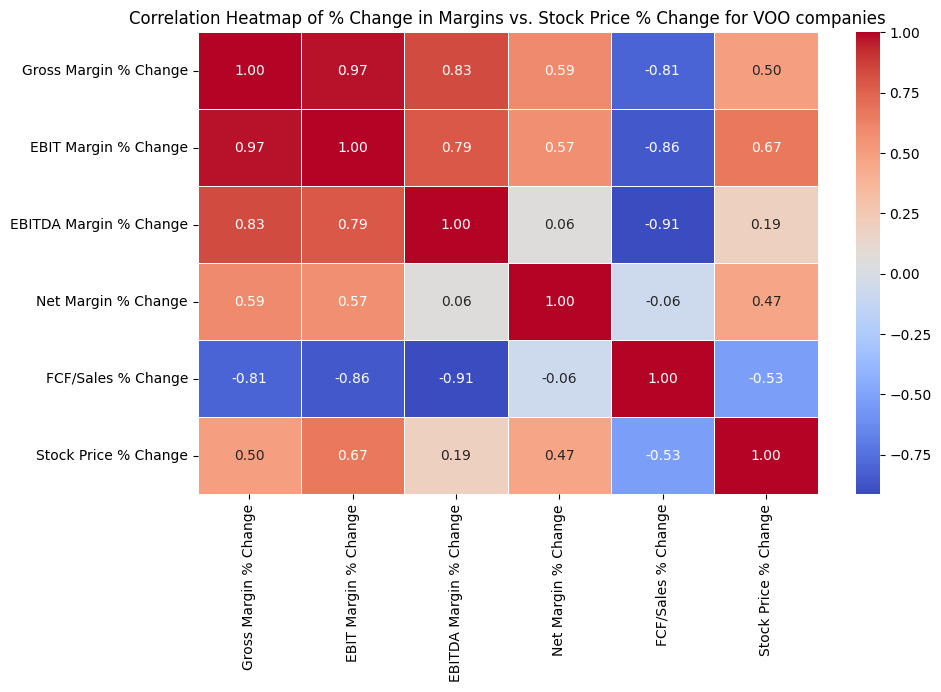

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col].replace({',': '', '\$': ''}, regex=True), errors='coerce')
    return df

def calculate_margins(df):
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])
    if 'Sales/Revenue' in df.columns:
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    df = df.sort_values('Year')  # Sort in ascending order
    df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
    df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
    df['EBITDA Margin % Change'] = df['EBITDA Margin'].pct_change() * 100
    df['Net Margin % Change'] = df['Net Margin'].pct_change() * 100
    df['FCF/Sales % Change'] = df['FCF/Sales'].pct_change() * 100
    df['Stock Price % Change'] = df['EOY Stock Price'].pct_change() * 100
    return df

for i in range(len(dataframes_all_VOO)):
    dataframes_all_VOO[i] = calculate_margins(dataframes_all_VOO[i])
    dataframes_all_VOO[i] = calculate_margin_and_stock_changes(dataframes_all_VOO[i])

# Collect all the required columns from each DataFrame
dfs_for_average = []
for df in dataframes_all_VOO:
    df_to_add = df[['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                    'Net Margin % Change', 'FCF/Sales % Change', 'Stock Price % Change']].copy()
    dfs_for_average.append(df_to_add)

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Correlation matrix
correlation_matrix = average_changes[['Gross Margin % Change', 'EBIT Margin % Change',
                                      'EBITDA Margin % Change', 'Net Margin % Change',
                                      'FCF/Sales % Change', 'Stock Price % Change']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of % Change in Margins vs. Stock Price % Change for VOO companies')
plt.show()

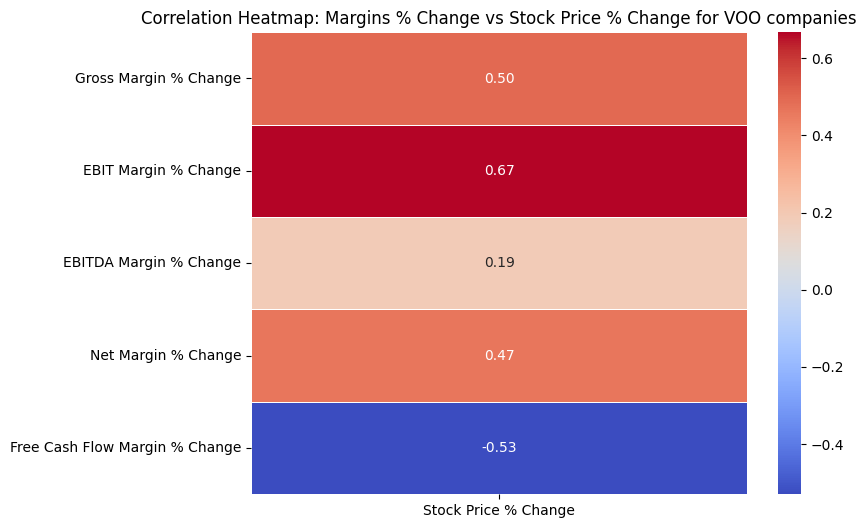

In [ ]:
def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col].replace({',': '', '\$': ''}, regex=True), errors='coerce')
    return df

def calculate_margins(df):
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])
    if 'Sales/Revenue' in df.columns:
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    df = df.sort_values('Year')  # Sort in ascending order
    df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
    df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
    df['EBITDA Margin % Change'] = df['EBITDA Margin'].pct_change() * 100
    df['Net Margin % Change'] = df['Net Margin'].pct_change() * 100
    df['Free Cash Flow Margin % Change'] = df['FCF/Sales'].pct_change() * 100
    df['Stock Price % Change'] = df['EOY Stock Price'].pct_change() * 100
    return df

for i in range(len(dataframes_all_VOO)):
    dataframes_all_VOO[i] = calculate_margins(dataframes_all_VOO[i])
    dataframes_all_VOO[i] = calculate_margin_and_stock_changes(dataframes_all_VOO[i])

# Collect all the required columns from each DataFrame
dfs_for_average = []
for df in dataframes_all_VOO:
    df_to_add = df[['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                    'Net Margin % Change', 'Free Cash Flow Margin % Change', 'Stock Price % Change']].copy()
    dfs_for_average.append(df_to_add)

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Calculate the correlation of only the margins with the stock price % change
columns_of_interest = ['Gross Margin % Change', 'EBIT Margin % Change',
                       'EBITDA Margin % Change', 'Net Margin % Change',
                       'Free Cash Flow Margin % Change', 'Stock Price % Change']

# Correlation matrix with only the stock price % change
correlation_matrix = average_changes[columns_of_interest].corr()[['Stock Price % Change']].drop('Stock Price % Change')

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Margins % Change vs Stock Price % Change for VOO companies')
plt.show()


EBIT Margin % Change appears to have the strongest correlation with stock price % changes and the lowest correlation is with EBITDA Margin % change


In [ ]:
dataframes_all_VSMAX = [new_TXG_df, new_UNF_df, new_NRDS_df, new_QTWO_df, new_BTU_df]

In [ ]:
years = [2019, 2020, 2021, 2022, 2023]


fcf_values = [794, 129, 717, 1581, 1412]   #NOT PRESENT IN EXCEL FILE


for i, year in enumerate(years):
    new_BTU_df.loc[new_BTU_df['Year'] == year, 'Free Cash Flow'] = fcf_values[i]


new_BTU_df

,Company Name,Company Code,EOY Stock Price,Year,Sales/Revenue,Cost of Goods Sold (COGS) incl. D&A,Depreciation & Amortization Expense,Gross Income,Net Income,EPS (Basic),...,Sales Trend,Cash & Short Term Investments,Cash Only,"Accounts Receivables, Gross",Total Current Assets,"Property, Plant & Equipment - Gross",Total Assets,EBIT,PS_Ratio,Free Cash Flow
0,Peabody Energy Corp,BTU,24.606743,2023,4869,3755,372,1114,760,-0.393800,...,Decreasing,969,-0.2585,67,2020,4972,816,-141,0.005054,1412.0
1,Peabody Energy Corp,BTU,25.900805,2022,5462,3649,367,1813,1295,1.566300,...,Increasing,1307,0.3699,49,2373,4679,1319,73,0.004742,1581.0
2,Peabody Energy Corp,BTU,9.872108,2021,3473,2901,353,572,336,1.168000,...,Increasing,954,0.3456,44,1802,4467,371,53,0.002843,717.0
3,Peabody Energy Corp,BTU,2.362639,2020,2906,2930,392,-24,-1856,-8.395000,...,Decreasing,709,-0.0314,64,1420,4422,-1860,1576,0.000813,129.0
4,Peabody Energy Corp,BTU,8.940777,2019,4556,4192,659,364,-215,-1.513625,...,NaN,732,0.1064,46,1614,6171,-188,223,0.001962,794.0


## What is the relationship between changes in key financial margins (Gross Margin, EBIT Margin, EBITDA Margin, Net Margin, and FCF/Sales) and the percentage change in stock price for the VSMAX companies?

<ipython-input-32-5df7116f51e4>:19: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
<ipython-input-32-5df7116f51e4>:20: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
<ipython-input-32-5df7116f51e4>:21: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['EBITDA Margin % Cha

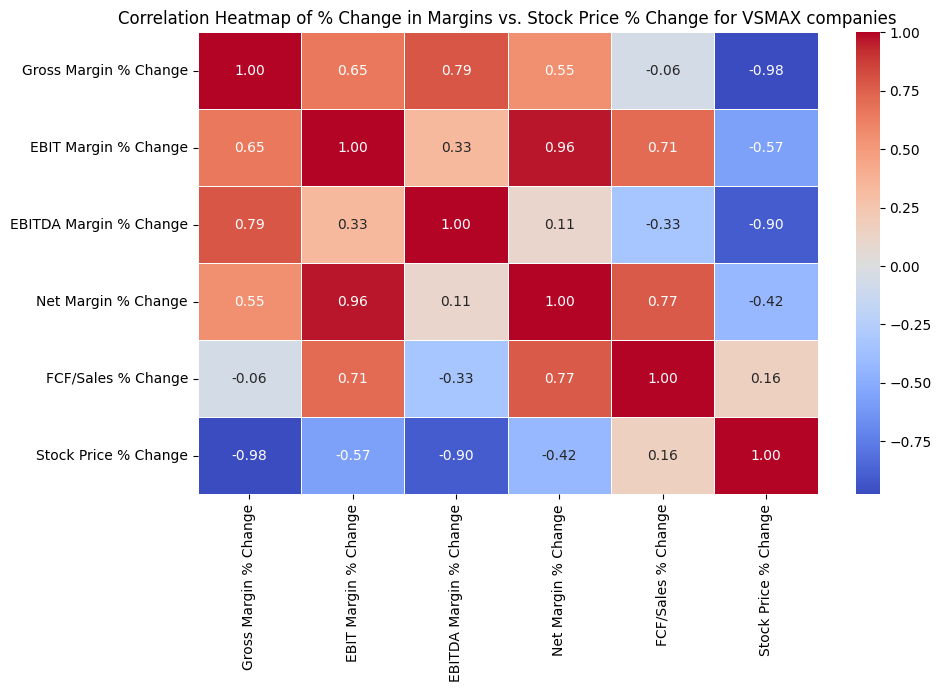

In [ ]:
def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col].replace({',': '', '\$': ''}, regex=True), errors='coerce')
    return df

def calculate_margins(df):
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])
    if 'Sales/Revenue' in df.columns:
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    df = df.sort_values('Year')  # Sort in ascending order
    df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
    df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
    df['EBITDA Margin % Change'] = df['EBITDA Margin'].pct_change() * 100
    df['Net Margin % Change'] = df['Net Margin'].pct_change() * 100
    df['FCF/Sales % Change'] = df['FCF/Sales'].pct_change() * 100
    df['Stock Price % Change'] = df['EOY Stock Price'].pct_change() * 100
    return df

for i in range(len(dataframes_all_VSMAX)):
    dataframes_all_VSMAX[i] = calculate_margins(dataframes_all_VSMAX[i])
    dataframes_all_VSMAX[i] = calculate_margin_and_stock_changes(dataframes_all_VSMAX[i])

# Collect all the required columns from each DataFrame
dfs_for_average = []
for df in dataframes_all_VSMAX:
    df_to_add = df[['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                    'Net Margin % Change', 'FCF/Sales % Change', 'Stock Price % Change']].copy()
    dfs_for_average.append(df_to_add)

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Correlation matrix
correlation_matrix = average_changes[['Gross Margin % Change', 'EBIT Margin % Change',
                                      'EBITDA Margin % Change', 'Net Margin % Change',
                                      'FCF/Sales % Change', 'Stock Price % Change']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of % Change in Margins vs. Stock Price % Change for VSMAX companies')
plt.show()

<ipython-input-29-356f5deab28f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).replace({',': '', r'\$': ''}, regex=True)
<ipython-input-29-356f5deab28f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
<ipython-input-29-356f5deab28f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

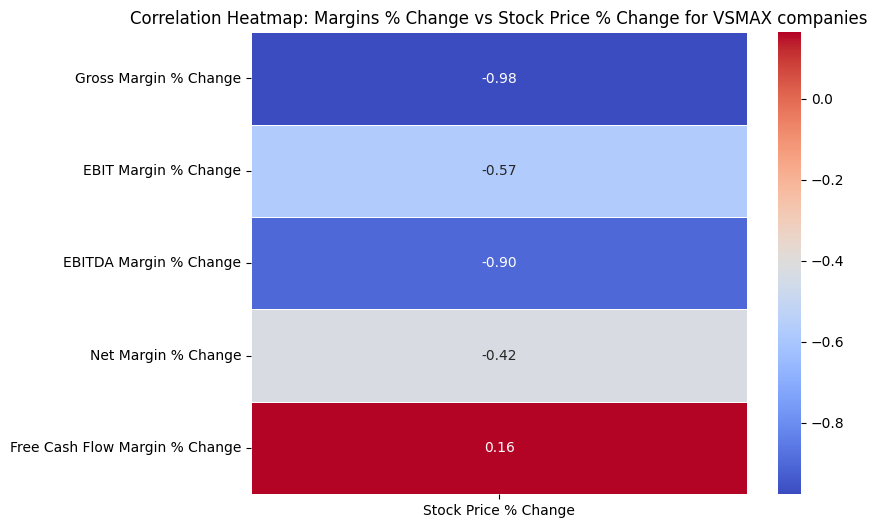

In [ ]:
for idx, df in enumerate(dataframes_all_VSMAX):
    df = df.loc[:, ~df.columns.duplicated()]
    dataframes_all_VSMAX[idx] = df

def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        if col in df.columns:
            # Ensure the column is treated as a string for replacement
            df[col] = df[col].astype(str).replace({',': '', r'\$': ''}, regex=True)
            # Convert the cleaned string to numeric
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            print(f"Warning: Column '{col}' does not exist in the DataFrame.")
    return df

def calculate_margins(df):
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])
    if 'Sales/Revenue' in df.columns:
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    df = df.sort_values('Year')  # Sort in ascending order
    df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
    df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
    df['EBITDA Margin % Change'] = df['EBITDA Margin'].pct_change() * 100
    df['Net Margin % Change'] = df['Net Margin'].pct_change() * 100
    df['Free Cash Flow Margin % Change'] = df['FCF/Sales'].pct_change() * 100
    df['Stock Price % Change'] = df['EOY Stock Price'].pct_change() * 100
    return df

for i in range(len(dataframes_all_VSMAX)):
    dataframes_all_VSMAX[i] = calculate_margins(dataframes_all_VSMAX[i])
    dataframes_all_VSMAX[i] = calculate_margin_and_stock_changes(dataframes_all_VSMAX[i])

# Collect all the required columns from each DataFrame
dfs_for_average = []
for df in dataframes_all_VSMAX:
    df_to_add = df[['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                    'Net Margin % Change', 'Free Cash Flow Margin % Change', 'Stock Price % Change']].copy()
    dfs_for_average.append(df_to_add)

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Calculate the correlation of only the margins with the stock price % change
columns_of_interest = ['Gross Margin % Change', 'EBIT Margin % Change',
                       'EBITDA Margin % Change', 'Net Margin % Change',
                       'Free Cash Flow Margin % Change', 'Stock Price % Change']

# Correlation matrix with only the stock price % change
correlation_matrix = average_changes[columns_of_interest].corr()[['Stock Price % Change']].drop('Stock Price % Change')

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Margins % Change vs Stock Price % Change for VSMAX companies')
plt.show()

There is high negative correlation between stock price change and gross margin % change and even with EBITDA Margin % change







In [ ]:
dataframes_all = [new_VICI_df, new_GEN_df, new_COP_df, new_AZO_df_updated, new_PNR_df,new_TXG_df, new_UNF_df, new_NRDS_df, new_QTWO_df, new_BTU_df]

## What is the relationship between changes in key financial margins (Gross Margin, EBIT Margin, EBITDA Margin, Net Margin, and FCF/Sales) and the percentage change in stock price for all the companies?

<ipython-input-52-9ae89bef4194>:38: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
<ipython-input-52-9ae89bef4194>:39: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
<ipython-input-52-9ae89bef4194>:40: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['EBITDA Margin % Cha

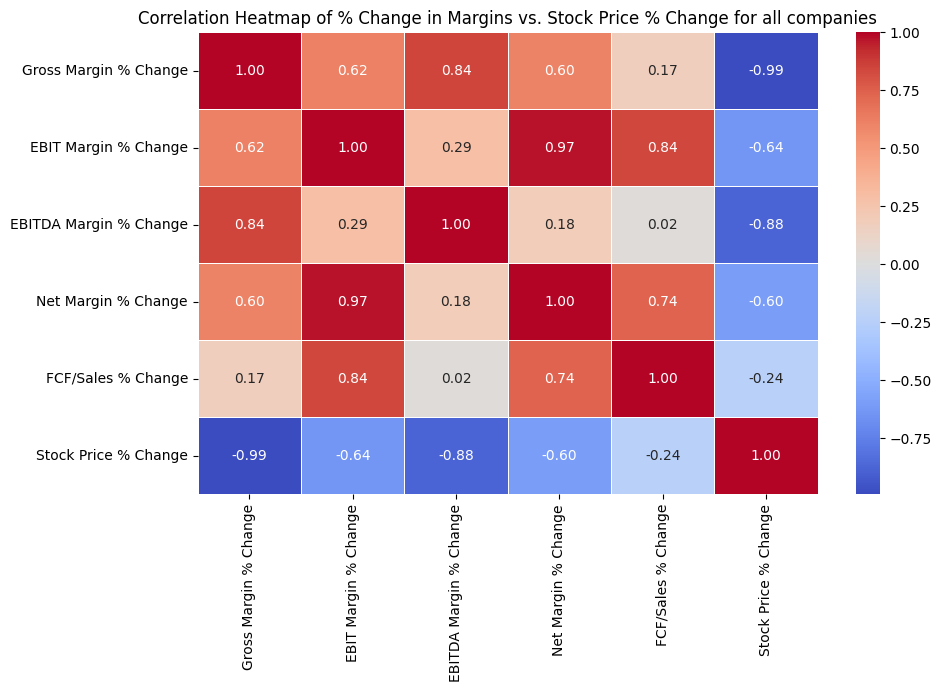

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        # Check if the column exists and handle duplicate columns
        if col in df.columns:
            # If the column is duplicated, keep only the first occurrence
            if df.columns.tolist().count(col) > 1:
                # Get the index of the first occurrence
                first_index = df.columns.get_loc(col)

                # Create a list of columns to keep
                columns_to_keep = [c for i, c in enumerate(df.columns) if i == first_index or c != col]
                df = df[columns_to_keep]
                print(f"Warning: Column '{col}' is duplicated, keeping the first occurrence.")
            # Now proceed with cleaning and conversion since duplicates are handled
            # The backslash needs to be escaped with another backslash when using regex=True
            df[col] = pd.to_numeric(df[col].astype(str).replace({',': '', r'\\': ''}, regex=True), errors='coerce')  # Replace to handle strings
        else:
            print(f"Warning: Column '{col}' does not exist in the DataFrame.")
    return df

def calculate_margins(df):
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])
    if 'Sales/Revenue' in df.columns:
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    df = df.sort_values('Year')  # Sort in ascending order
    df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
    df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
    df['EBITDA Margin % Change'] = df['EBITDA Margin'].pct_change() * 100
    df['Net Margin % Change'] = df['Net Margin'].pct_change() * 100
    df['FCF/Sales % Change'] = df['FCF/Sales'].pct_change() * 100
    df['Stock Price % Change'] = df['EOY Stock Price'].pct_change() * 100
    return df

# Assuming dataframes_all is a list of dataframes for different companies
for i in range(len(dataframes_all)):
    dataframes_all[i] = calculate_margins(dataframes_all[i])
    dataframes_all[i] = calculate_margin_and_stock_changes(dataframes_all[i])

# Collect all the required columns from each DataFrame
dfs_for_average = []
for df in dataframes_all:
    df_to_add = df[['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                    'Net Margin % Change', 'FCF/Sales % Change', 'Stock Price % Change']].copy()
    dfs_for_average.append(df_to_add)

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Correlation matrix
correlation_matrix = average_changes[['Gross Margin % Change', 'EBIT Margin % Change',
                                      'EBITDA Margin % Change', 'Net Margin % Change',
                                      'FCF/Sales % Change', 'Stock Price % Change']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of % Change in Margins vs. Stock Price % Change for all companies')
plt.show()

<ipython-input-51-fd554e741ad7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).replace({',': '', r'\$': ''}, regex=True)
<ipython-input-51-fd554e741ad7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
<ipython-input-51-fd554e741ad7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

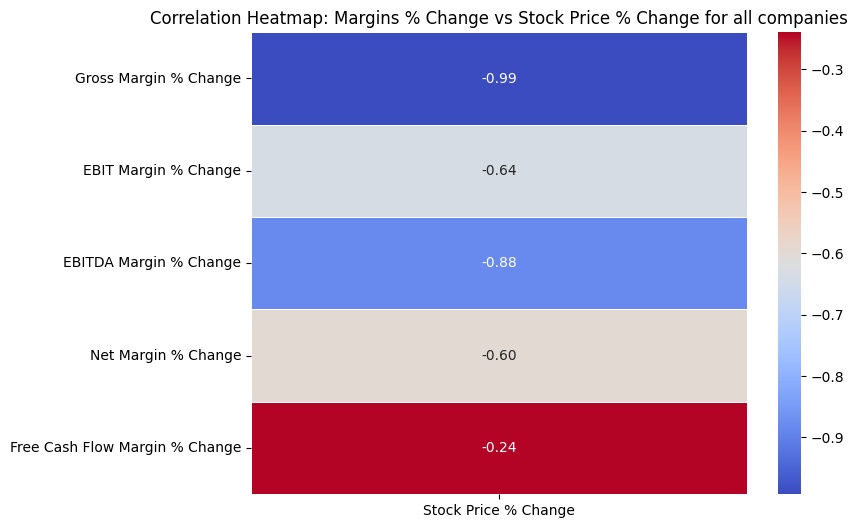

In [ ]:
for idx, df in enumerate(dataframes_all):
    df = df.loc[:, ~df.columns.duplicated()]
    dataframes_all[idx] = df

def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        if col in df.columns:
            # Ensure the column is treated as a string for replacement
            df[col] = df[col].astype(str).replace({',': '', r'\$': ''}, regex=True)
            # Convert the cleaned string to numeric
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            print(f"Warning: Column '{col}' does not exist in the DataFrame.")
    return df

def calculate_margins(df):
    df = clean_and_convert_to_numeric(df, ['Sales/Revenue', 'Gross Income', 'EBIT', 'EBITDA',
                                           'Net Income', 'Free Cash Flow', 'EOY Stock Price'])
    if 'Sales/Revenue' in df.columns:
        df['Gross Margin'] = (df['Gross Income'] / df['Sales/Revenue']) * 100
        df['EBIT Margin'] = (df['EBIT'] / df['Sales/Revenue']) * 100
        df['EBITDA Margin'] = (df['EBITDA'] / df['Sales/Revenue']) * 100
        df['Net Margin'] = (df['Net Income'] / df['Sales/Revenue']) * 100
        df['FCF/Sales'] = (df['Free Cash Flow'] / df['Sales/Revenue']) * 100
    return df

def calculate_margin_and_stock_changes(df):
    df = df.sort_values('Year')  # Sort in ascending order
    df['Gross Margin % Change'] = df['Gross Margin'].pct_change() * 100
    df['EBIT Margin % Change'] = df['EBIT Margin'].pct_change() * 100
    df['EBITDA Margin % Change'] = df['EBITDA Margin'].pct_change() * 100
    df['Net Margin % Change'] = df['Net Margin'].pct_change() * 100
    df['Free Cash Flow Margin % Change'] = df['FCF/Sales'].pct_change() * 100
    df['Stock Price % Change'] = df['EOY Stock Price'].pct_change() * 100
    return df

for i in range(len(dataframes_all)):
    dataframes_all[i] = calculate_margins(dataframes_all[i])
    dataframes_all[i] = calculate_margin_and_stock_changes(dataframes_all[i])

# Collect all the required columns from each DataFrame
dfs_for_average = []
for df in dataframes_all:
    df_to_add = df[['Year', 'Gross Margin % Change', 'EBIT Margin % Change', 'EBITDA Margin % Change',
                    'Net Margin % Change', 'Free Cash Flow Margin % Change', 'Stock Price % Change']].copy()
    dfs_for_average.append(df_to_add)

# Concatenate all DataFrames
combined_df = pd.concat(dfs_for_average, ignore_index=True)

# Group by 'Year' and compute the mean of percentage changes
average_changes = combined_df.groupby('Year').mean().reset_index()

# Calculate the correlation of only the margins with the stock price % change
columns_of_interest = ['Gross Margin % Change', 'EBIT Margin % Change',
                       'EBITDA Margin % Change', 'Net Margin % Change',
                       'Free Cash Flow Margin % Change', 'Stock Price % Change']

# Correlation matrix with only the stock price % change
correlation_matrix = average_changes[columns_of_interest].corr()[['Stock Price % Change']].drop('Stock Price % Change')

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Margins % Change vs Stock Price % Change for all companies')
plt.show()

High negative correlation between gross margin % change and stock price % change and lowest negative correlation is between stock price % change and Free Cash Flow Margin % change when taking into account all 10 companies




#**Generative AI disclosure statement:**

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

**Content Generation:** We used ChatGPT to brainstorm ideas and structure the initial outline of the project. The AI helped us refine our thesis statement and suggested key points to include in each section.

**Research Assistance:** ChatGPT was used to summarize research articles and generate concise overviews of relevant topics, helping us better understand and integrate complex concepts such as the P/S Ratio.

**Code Review and Debugging:** GeminiAI and ChatGPT suggested ways to improve our Python code, including optimizing algorithms and resolving potential errors.
3 prominent spots where the for loops that were used in making the Bar Chart and the Heatmap and the use of the new_UNF_df in order to include the UNF data in the pie chart.

**Proofreading and Grammar Checks:** We used QuillBot to refine our writing, improve readability, and ensure grammatical accuracy.




###Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.

# References

https://www.schwab.com/learn/story/3-financial-statements-to-measure-companys-strength
https://www.wsj.com/finance?mod=wsjheader_logo

https://finance.yahoo.com/

https://www.schwab.com/learn/story/five-key-financial-ratios-stock-analysis